# Latex Config
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}
\newcommand{\vx}{{\mathbf x}}
\newcommand{\hx}{\hat{\mathbf x}}
\newcommand{\vbt}{{\mathbf\beta}}
\newcommand{\vy}{{\mathbf y}}
\newcommand{\vz}{{\mathbf z}}
\newcommand{\vb}{{\mathbf b}}
\newcommand{\vu}{{\mathbf u}}
\newcommand{\vv}{{\mathbf v}}
\newcommand{\vw}{{\mathbf w}}
\newcommand{\va}{{\mathbf a}}
\newcommand{\vp}{{\mathbf p}}
\newcommand{\col}{{\operatorname{Col}}}
\newcommand{\nul}{{\operatorname{Nul}}}
\newcommand{\rank}{{\operatorname{rank}}}
\newcommand{\setb}{{\mathcal{B}}}$

$\newcommand{\bm}[1]{\mathbf{#1}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\argmax}{\operatornamewithlimits{argmax}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\Var}{\mathop{\mathrm{Var}}\nolimits}
\newcommand{\Covar}{\mathop{\mathrm{Covar}}\nolimits}
\newcommand{\E}{\mathop{\mathrm{E}}\nolimits}
\newcommand{\dx}{\mathrm{d}x}
\newcommand{\C}{\mathbb{C}}
\newcommand{\im}{\textrm{im}}
\newcommand{\rref}{\texttt{rref}}$

$\newcommand{\der[1]}{\dfrac{d}{dx}\left[#1\right]}
\newcommand{\ve[1]}{\mathbf{\overrightarrow{#1}}}$
$\newcommand{\proj}{\textrm{proj}}
\newcommand{\spn}{\textrm{Span}}
\newcommand{\refl}{\textrm{ref}}$


$\newcommand{\pder}[2][]{\frac{\partial#1}{\partial#2}}$

In [146]:
# Here are some imports which will be used in the code in the rest of the lab

# Jupyter notebook specific 
from ipywidgets import interactive, fixed, IntSlider, HTML, HTMLMath, FloatSlider,HBox, Button
from IPython.display import Image
#from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex

# Imports used for the code in CS 237
# @Author: Kai Bernardini (kaidb@bu.edu)
# Due Date: TBD
import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation
import scipy
from bqplot import *
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.datasets
from sklearn.datasets import load_breast_cancer
import sys # For system level commands. 
#sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
#plt.style.use('seaborn') # pretty plots 
from jupyterthemes import jtplot
from sklearn.datasets import make_classification
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
# You do not need any more imports 
%matplotlib inline

In [2]:

import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import linear_model,svm
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_circles
from sklearn.svm import SVC  # "Support Vector Classifier"
from sklearn.datasets.samples_generator import make_blobs # tool for contrived data
from mpl_toolkits import mplot3d
from sklearn.neural_network import MLPClassifier
import matplotlib.mlab as mlab
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.manifold import TSNE
from pandas.plotting  import scatter_matrix


In [3]:
from traitlets.config.manager import BaseJSONConfigManager
path = "~/Anaconda3/envs/rise_latest/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "transition": "zoom",
              "start_slideshow_at": "selected",
                "scroll": True,
    'width': 1024,
        'height': 768,
})

{'transition': 'zoom',
 'start_slideshow_at': 'selected',
 'scroll': True,
 'width': 1024,
 'height': 768}

In [4]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

In [5]:
# source https://github.com/damianavila/RISE/issues/32
import binascii

def hide_code_in_slideshow():
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;

            while (!p.hasClass("cell")) {
                p=p.parent();

                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display_html(html, raw=True)

In [6]:
%%javascript
Jupyter.notebook.config.update({"load_extensions":{"calico-spell-check":true,
                                                  "calico-document-tools":true,
                                                  "calico-cell-tools":true}})

<IPython.core.display.Javascript object>

In [7]:
%%javascript
document.body.classList.add('theme-dark')

<IPython.core.display.Javascript object>

# The Geometry of  Machine Learning  
- @Author: Kai Bernardini
    - Masters Student in Computer Science and Mathematics  <br>
    - Repo: https://github.com/kaidb
    - Email: kaidb@bu.edu
- Agenda: <br>
- Supervised Machine Learning
    - Classification
- Geometrization of a the real world
    - Feature Maps 
- Logistic Regression and its Generalizations
    - Neural Networks 
- Mathematics of Machine Learning
- Examples and demos 
- Future Work 

# What is Machine Learning?
- Short Answer: 
    - It is  Applied Statistics
- Slightly longer Answer:
    - Informally, Machine Learning  attempts to get computers to perform a task without being explicitly programmed to do so.
- Example: 
    - AlphaGo Defeating a Go master without having a specific rule for every configuration
    - Building a model to predict the price of a stock based on historical informaiton 
- Non-Example: 
    - Writing a Tic-Tac-Toe AI that has a rule for every board configuration
    - Rule Based chatbot 

# Supervised Machine Learning 
- The goal of a supervised learning algorithm is to leverage a labeled data set to train a model capable of predicting  the value of novel, unlabeled data points.
    -  Motivating example will be an instance of a **classification problem**.   
-  Classification Problems attempt to predict the discrete label of an outcome based on some features. 
    - Example: 
        - Predicting whether or not a tumor is malignant based on cell adhesion 
        - Predicting whether or not I will do my homework based on how many days are remaining until the due date. 

# Overview of Statistical Learning Theory 
- Let $X\in \mathbb{R}^p$ denote a real valued random input vector, and $Y\in \mathbb{R}$ denote a real valued output variable
- We have an associated joint distribution $Pr(X,Y)$
- The goal of statistical learning theory is to construct a function $f$ that allows us to predict $Y$ from $X$
    - In particular, $$f:\mathbb{R}^p \to \mathbb{R}$$
- We assume that such a function exists, and we will call it the *ground truth function*
- Typically, $f$ is unknown and we seek to approximate it with some function $\hat{f}$.
- This theory requires a *Loss function*, which tells us how *good* of an approximation $\hat{f}$ is to $f$
This allows us to formally define what choices of $\hat{f}$ are better than others. 
- We find our estimate to $f$ by minimizing the loss  *pointwise*
- Lets give a motivating example


# How Does a Machine Learn?
<img src="robot hand.png" alt="Machine Hand">


## How Does a Machine Learn?
- By approximating $f$ 
- This is typically done using optimization techniques that incrementally improve our estimate $\hat{f}$ 
- As the estimates get better, the machine's performance on the given task improves 
- Mathematically, it is just optimization theory! (which in general can be very difficult). 

In [8]:
def synthetic_example(mu=0, sigma = 1,N=400, c_boundary=False,y_ints=[5,6,7], SEED=4):
    np.random.seed(SEED)
    plt.figure(figsize=(9,9))
    plt.title("Synthetic Data Example", fontsize=20)
    c1 =  np.ones( (2,N)) + np.random.normal(0,sigma,(2,N))
    c2 =  5 + np.zeros( (2,N)) + np.random.normal(0,sigma,(2,N))
    plt.scatter(c1[0], c1[1], edgecolors='b', label='Malignant Tumor')
    plt.scatter(c2[0], c2[1], c='r', edgecolors='b', label='Benign  Tumor')
    if c_boundary:
        xb = [i for i in range(-2,9)]
        dc=1
        for j in y_ints:
            yb = [-1 * i + j for i in xb]
            plt.plot(xb,yb,label='Desicion Boundary '+ str(dc) ,linewidth=2 )
            dc += 1
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=18)
    
    plt.grid(True)
    plt.xlabel("Feature 1", fontsize=18)
    
    plt.ylabel("Feature 2", fontsize=18)
    labels1 =  np.zeros(N)
    labels2 = np.ones(N)
    y =  np.concatenate((labels1,labels2),axis=0)
    x0 =  np.concatenate((c1[0],c2[0]),axis=0)
    x1 =  np.concatenate((c1[1],c2[1]),axis=0)
    X=np.array([x0,x1,y]).T
    df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Target'])
    plt.show()
    return df
    

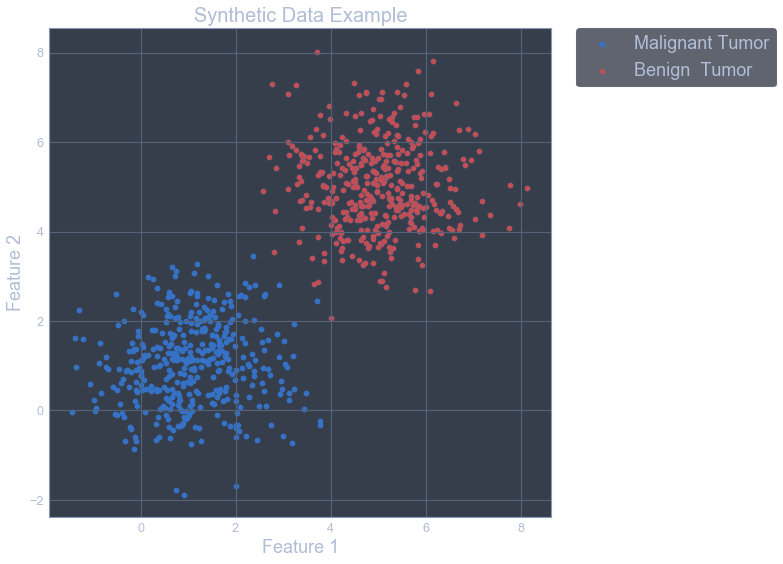

In [9]:
hide_code_in_slideshow()
toy_data = synthetic_example(sigma=1)


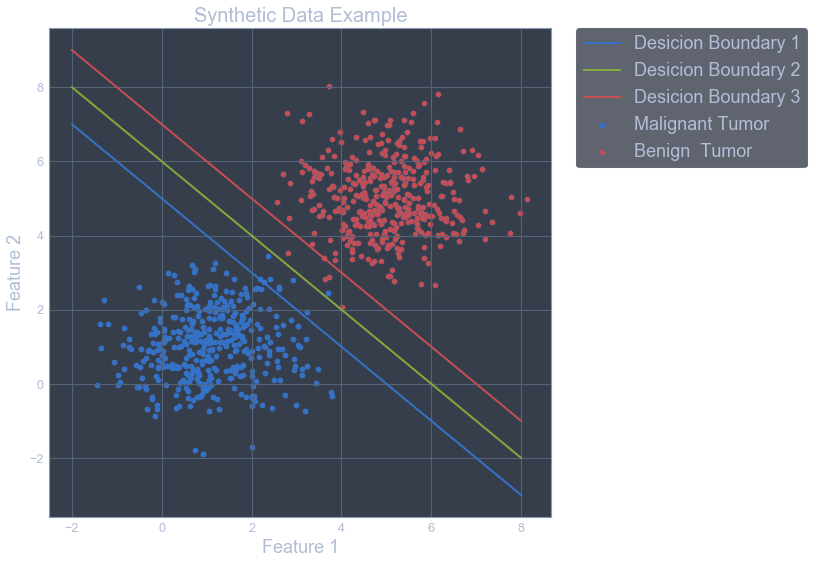

In [10]:
hide_code_in_slideshow()
toy_data = synthetic_example(sigma=1, c_boundary= True)

## How to find the "best" Decision boundary?
- Well, What do you mean by "best"?
- There are many notions of "best" 
- Lets consider something easier first 

# Probabilistic Modeling and Maximum LIkelihood 
## Bernoulli Parameter Estimation Example (Coin flips)
- If I flip a coin 1000 times and we observe 700 heads, and 300 tails, what would be the "best" estimate for the probability of getting a heads?
- Again, what is meant by best?
- Lets give these outcomes names. $X_1,\ldots X_{n}$ are all Bernoulli Random Variables with $$Pr(X_i=k) = p^{k_i}(1-p)^{1-k_i}$$ for $k_i\in \{0,1\}$
- Then the probability of observing a particular string of outcomes given the parameter $p$ is exactly $$Pr(X_1, X_2, \ldots X_{n}) = \prod_{i=1}^{n} Pr(X_i) = \prod_{i=1}^{n} p^{X_i} (1-p)^{1-X_{i}} $$
    - Note that 
        - if $X_i=1 \implies p^{X_i}=p$ and $(1-p)^{1-X_i} =1$ 
        - and   $X_i=0 \implies p^{X_i}=1$ and $(1-p)^{1-X_i} =1-p$
- One reasonable choice if $p$ is whatever makes that value the **largest!**
- As a computaitonal concern, it is easier to maximize the **log-likelihood** as the logarithm function takes products to sums. 
    - Hence, $$p= \max_{p} \log \big(\prod_{i=1}^{n} p^{X_i} (1-p)^{1-X_{i}} \Big) = \max_p \sum_{i=1}^{n} X_i\log(p) + (1-X_i) \log(1- p)  $$
- In the case for $n =1000$ with 700 heads observed, it turns out that $p=\frac{700}{1000}$ will maximize the **likelihood** of the observed outcomes
- In general, let $H$ be the number of heads we observe and $T$ the number of tails we observe. 
    - Then the estimate for $p$ that **maximizes the likelihood** will be $\frac{H}{T+H}$
    - The proof is a good exercise. Differentiate  the log-likelihood function with respect to p and set it equal to zero.
    - Solve for p in terms of the number of heads, and number of tails

In [11]:
def log_likelihood(X, p):
    """
    Returns the log likelhood of observing X given Pr(X_i=p)
    """
    pos_prob  = X * np.log(p)
    neg_prob = (1-X) * np.log(1-p)
    return np.sum(pos_prob + neg_prob)
def heads_tails(H, T):
    heads = np.ones(H)
    tails = np.zeros(T)
    return np.concatenate( (heads, tails))


def cost_values(H,T, p_grid):
    X = heads_tails(H,T)
    costs = [log_likelihood(X,p) for p in p_grid]
    return costs 

def plot_cost_graph(H,T):
    X = heads_tails(H,T)
    plt.figure(figsize=(8,8))
    print("PLotting")
    p_grid = np.arange(.01, 1,.01)
    costs = [log_likelihood(X,p) for p in p_grid]
    plt.plot(p_grid, costs , c='r')
    opt = np.sum(X)/ len(X)
    cost_opt = log_likelihood(X, opt)
    plt.scatter(opt, cost_opt, marker='x', s=100, c='pink' )
    plt.title("Maximum Likelihood Solution")
    plt.xlabel("Probability of Heads $p$")
    plt.ylabel("Log Likelihood")
    plt.ylim(-250, -50)
    plt.xlim(0,1)
    plt.show()
    

In [12]:
#from bqplot import LinearScale, Figure, Scatter
#from bqplot import pyplot as plt
from bqplot import LinearScale, Figure, Scatter, Lines, Axis, pyplot
#from bqplot import pyplot as plt

In [13]:
hide_code_in_slideshow()
    
import numpy as np
xs =  LinearScale()
ys = LinearScale()
x = np.arange(.01, 1,.01)

y = cost_values(50, 50, x)


line = Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red'],)
xax = Axis(scale=xs, label='probability of heads')
yax = Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='Likelihood', )

fig = Figure(marks=[line], axes=[xax, yax], animation_duration=1000,title="Likelihood" )
display(fig)



style = {'description_width': '100'}
heads_slider = IntSlider( max=1000, min=0,value=100, description='Heads:',readout=True,
    readout_format='d', style = style)
tails_slider = IntSlider(max=1000, min=0,value=100, description=' Tails:',readout=True,
    readout_format='d',style = style)


def update_dist(change):
    line.y= cost_values(heads_slider.value,tails_slider.value, x)
    


heads_slider.observe(update_dist, 'value')
tails_slider.observe(update_dist, 'value')
text_display = HTML( "Heads Count={} <br /> Tails Count={} <br />  Maximum Likelihood Estimate={} <br />".format(heads_slider.value, tails_slider.value, 
                                                                                                 heads_slider.value/ (heads_slider.value + tails_slider.value)) )
def update_html(change):
    text_display.value = "Heads Count={} <br />  Tails Count={} <br />  Maximum Likelihood Estimate={} <br />".format(heads_slider.value, tails_slider.value, 
                                                                                                 heads_slider.value/ (heads_slider.value + tails_slider.value)) 

heads_slider.observe(update_html, 'value')
tails_slider.observe(update_html, 'value')
display(heads_slider, tails_slider)
text_display

Figure(animation_duration=1000, axes=[Axis(label='probability of heads', scale=LinearScale()), Axis(label='Lik…

IntSlider(value=100, description='Heads:', max=1000, style=SliderStyle(description_width='100'))

IntSlider(value=100, description=' Tails:', max=1000, style=SliderStyle(description_width='100'))

HTML(value='Heads Count=100 <br /> Tails Count=100 <br />  Maximum Likelihood Estimate=0.5 <br />')

In [14]:
hide_code_in_slideshow()
interactive(plot_cost_graph, H=(1,100), T=(1,100), )


interactive(children=(IntSlider(value=50, description='H', min=1), IntSlider(value=50, description='T', min=1)…

# Introduction To Logistic Regression
## At a Glance 
- For now, we assume that the target variable $Y$ (the outcome) has only two values, 0 or 1.  (i.e., either a patient has  cancer  or does not. )
- We also assume that our collection of datapoints $X$ can be used to determine $Y$ in some meaningful way. 
- In particular, we assume there is some function parameterized by $\theta = [b,w].T$ for $b\in \mathbb{R}$ and $w\in \mathbb{R}^p$, call it $h_{b,w}(x)$
- General Assumptions:
$$P(\ y=1 \; \vert \; x \ ; \ b,w \ ) = h_{w,b}(x)$$ 
$$P(\ y=0 \; \vert \; x \ ; \ b,w \ ) = 1 - h_{b,w}(x)$$


## Maximum Likelihood  Logistic Regression 
- As with the coin flips, we wish to maximize the likelihood of observations $ \{ (x^{(i)}, y^{(i)}) \}_{i=1}^n$ under the assumption that 
- 
$$P(\ y=1 \; \vert \; x \ ; \ b,w \ ) = h_{w,b}(x)$$ 
$$P(\ y=0 \; \vert \; x \ ; \ b,w \ ) = 1 - h_{b,w}(x)$$

- Continuing as before, we get

$$L(\theta) = \prod_{i=1}^{m}{h_{b,w}(x^i)}^{y^{(i)}}(1-h_{b,w}(x^i))^{1-y^{(i)}}$$

Taking the log of both sides gives

$$\log L(b,w) =\sum_{i=1}^{n} \Big(  \ -y^{(i)} \log(h_{b,w}(x^{(i)})) \ - \ (1 - y^{(i)})\log(1-h_{b,w}(x^{(i)})) \Big)$$
- Note by convention, we minimize the loss function (in this case the negative log likelihood) <br>
    
 Goal is is to find  <br>
 
$$ \hat{b}, \hat{w} = \min_{b,w} L(b,w,X,y) = \min_{b,w}\sum_{i=1}^{n} \Big(   -y^{(i)} \log(h_{b,w}(x^{(i)}))-  (1 - y^{(i)})\log(1-h_{b,w}(x^{(i)})) \Big)$$

# How to Choose $h_{w,b}(\cdot)$?
- A common setup is as follow
$h(x) = \sigma( X w + b)$
for $X \in \mathbb{R}^{n \times p }$ ( $n$ examples, $p$ predictors) and $w \in \mathbb{R}^p$

where function g is the sigmoid function. The sigmoid function is defined as:

$\sigma(z) = \dfrac{1}{1+e^{-z}}$
- One good choice is $\sigma(x)$ -- the sigmoid function

### Sigmoid function###
This sigmoid function $$\sigma: \mathbb{R}\to (0,1)\subset \mathbb{R}$$ defined by $$x \mapsto \frac{1}{1+e^{-x}}$$ 


A vector extension to this function can be constructed by applying it element wise to a vector. IE, $$\sigma: \mathbb{R}^n \to (0,1)^n \subset \mathbb{R}^n$$ where
$$ \text{for } x \in \mathbb{R}^n \text{,     } \sigma(x) =\sigma \begin{pmatrix}
    x_1  \\
    x_2  \\
    \vdots  \\
    x_n  \\
\end{pmatrix}= \begin{pmatrix}
    \sigma(x_1)  \\
    \sigma(x_2)  \\
    \vdots  \\
    \sigma(x_n)  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    \vdots  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix} $$


In [15]:
def g(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

Text(0.5,1,'Sigmoid Function')

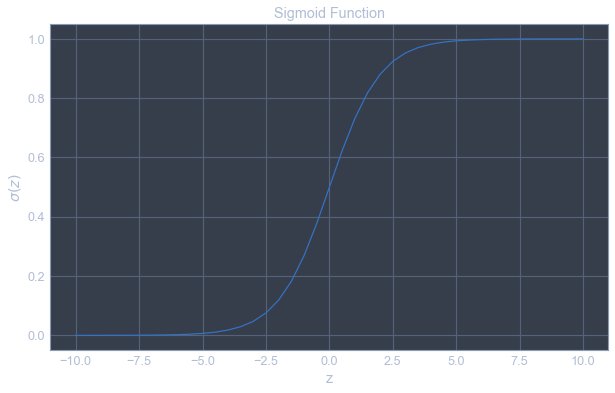

In [16]:
hide_code_in_slideshow()
plt.figure(figsize=(10,6))
plt.plot(np.arange(-10,10.5,.5) ,g( np.arange(-10,10.5,.5)))
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.grid(True)
plt.title("Sigmoid Function")

## Logistic Regression Setup
For a single observation
 $$ \log \Big(\frac{Pr(Y_i|x^{(i)},b,w )}{1- Pr(Y_i|x^{(i)},b,w )} \Big) = \log \Big( \frac{h_{b,w} (x^{i})}{1 - h_{b,w} (x^{i})} \Big) = b + w_1 x_1^{(i)} + \ldots + w_p x_p^{(i)} = b + x^{(i)T} w $$
- Find $w,b$ that maximize the log likelihood given $\{ (x^{(i)}, y_i) \}_{i=1}^n$
    - Or equivalently minimize the negative log-likelihood 


# Quick Remark On Optimization
- There is no closed form solution, so we must rely on numerical methods. 
- One such method is Gradient Descent
- <b>WARNING: In general, optimization is incredibly difficult. This is a special case </b>
## Gradient Decent at a glance
- Choose a learning rate $\alpha$ 
- for $k$ iterations, do the following:
    - $$w \leftarrow w - \alpha (\nabla_w L)$$
    - $$b \leftarrow b - \alpha \Big(\frac{\partial }{\partial b}L \Big)$$
    
## In Practice
- Logistic regression is typically optimized using a variant  Newton's Method 
-  see [Broyden–Fletcher–Goldfarb–Shanno (BFGS)]( https://en.wikipedia.org/wiki/BFGS_method)

In [17]:
toy_data = toy_data.sample(frac=1).reset_index(drop=True)

In [18]:
X, y = toy_data[["Feature1", "Feature2"]].values, toy_data.Target
#make_classification(300, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:200], y[:200])
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)


In [19]:
clf.coef_, clf.intercept_

(array([[0.84181426, 0.8799336 ]]), array([-4.70914253]))

[(-5, 10), Text(0,0.5,'$X_2$'), (-5, 10), Text(0.5,0,'$X_1$'), None]

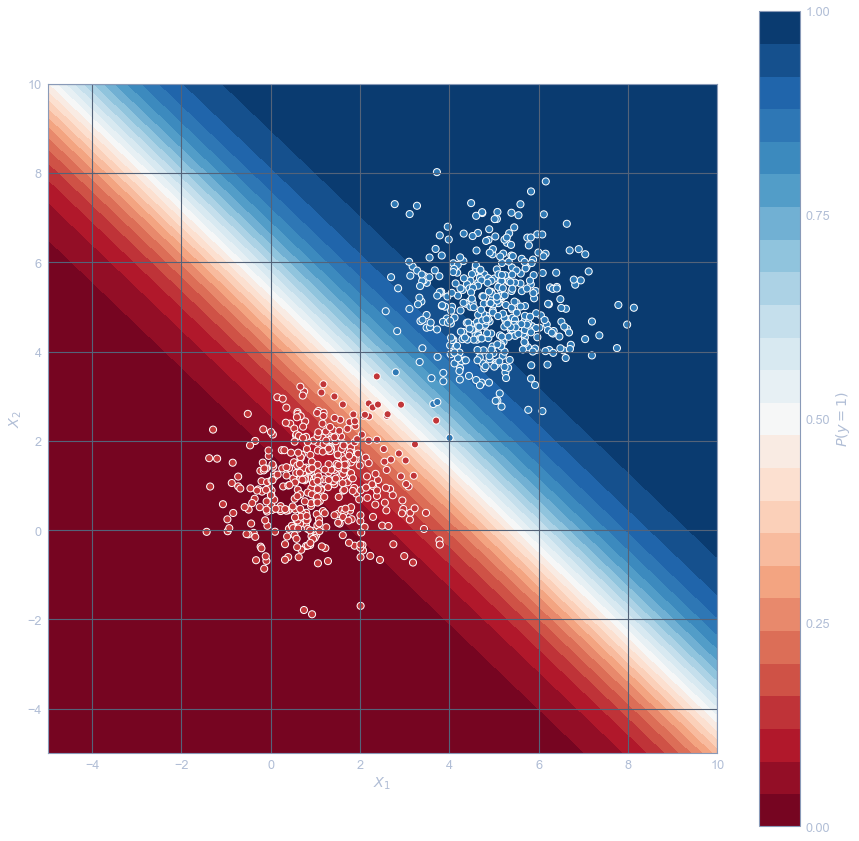

In [20]:
hide_code_in_slideshow()
f , ax = plt.subplots(figsize=(15, 15))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 10), ylim=(-5, 10),
       xlabel="$X_1$", ylabel="$X_2$")

[(-5, 10), Text(0,0.5,'$X_2$'), (-5, 10), Text(0.5,0,'$X_1$'), None]

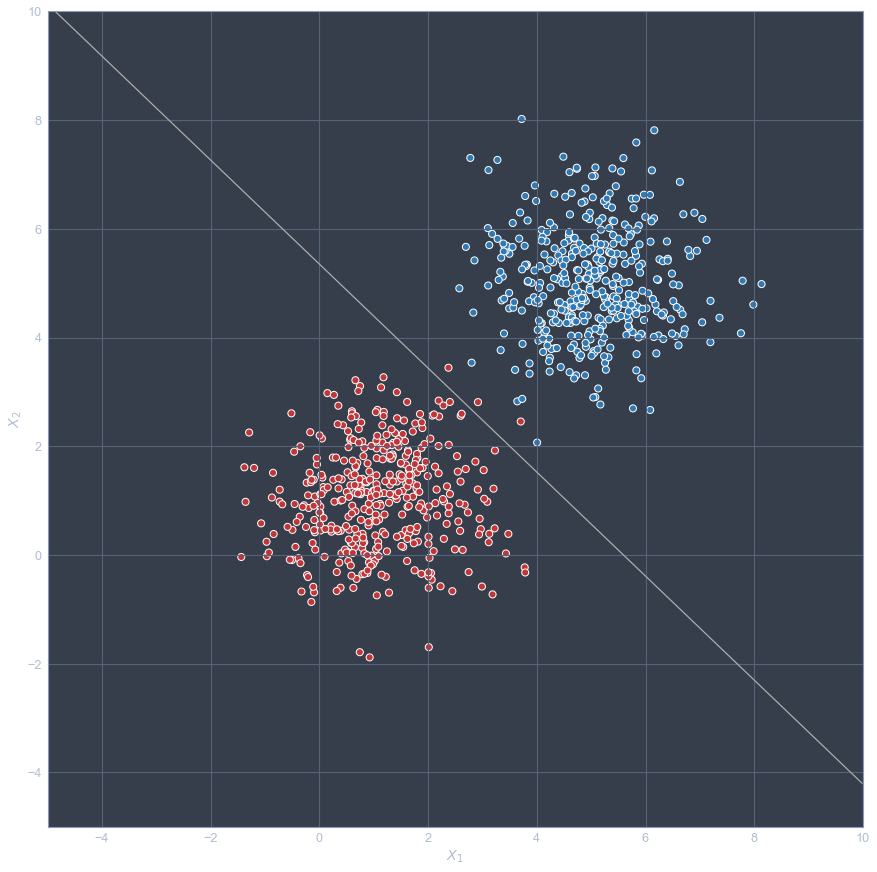

In [21]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1.2)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 10), ylim=(-5, 10),
       xlabel="$X_1$", ylabel="$X_2$")

In [22]:

def g(z):
    """
    This function computes the sigmoid function across all values of z

    Argument:
    z -- numpy array of real numbers

    Returns:
    sigmoid(z)
    """
    
    return 1 / (1 + np.exp(-z))

def h(b, w ,X):
    """
    This function implments the logistic regression hypothesis function

    Argument:
    b -- bias
    w -- predictive parameters
    X -- data matrix of size (numbers_examples, number_predictors)

    Returns:
    sigmoid(Xw + b)
    """
    return g( (X @ w) + b)

def computeCost(b, w, X, Y): 
    """
    Computes Cross Entropy Loss function 

    Arguments:
    b -- bias
    w -- predictive parameters
    X -- data matrix of size (numbers_examples, number_predictors)
    Y -- Ground truth labels of size (number_examples, 1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    """
    m = Y.size
    term1 = np.dot(-np.array(Y).T,np.log(h(b,w,X)))
    term2 = np.dot((1-np.array(Y)).T,np.log(1-h(b,w,X)))
    return float( (1./m) * ( np.sum(term1 - term2) ) )



/Users/kbernardini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
/Users/kbernardini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


Text(0.5,0,'Cost')

/Users/kbernardini/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


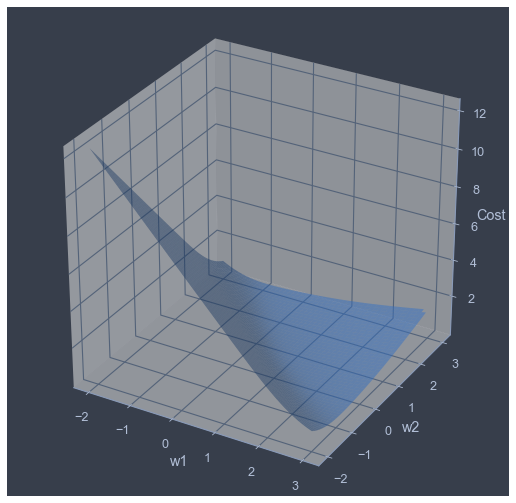

In [23]:
hide_code_in_slideshow()
from mpl_toolkits.mplot3d import Axes3D
b = -4.7 # assume we know this somehow 
#ms = np.linspace(-8.0, 8.0, 50)
#bs = np.linspace(-8, 8, 50)
ms = np.arange(-2,3.01,.1)
bs = np.arange(-2,3.01,.1)
M, B = np.meshgrid(ms, bs)

zs = np.array([computeCost(b,np.array([mp, bp]).reshape((2,1)),X,y.reshape(len(y),1) ) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d') 

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')


<a list of 15 text.Text objects>

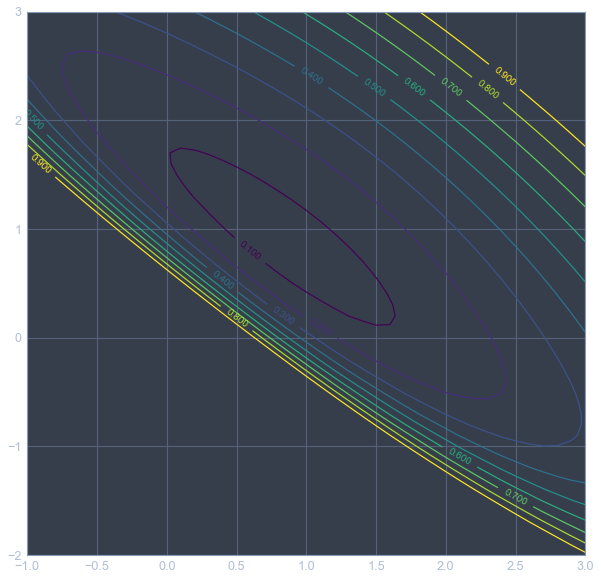

In [24]:
hide_code_in_slideshow()
plt.figure(figsize=(10,10))
plt.xlim(-1,3)
CT = plt.contour(M,B,Z, np.linspace(0,.9,10))
plt.clabel(CT, inline=1, fontsize=10, )

In [25]:
from IPython.core.display import display, HTML
import json

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Cost", initialCamera = None, save_fie=False):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px"
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera

    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    if save_fie:
        Html_file= open(save_file,"w")
        Html_file.write(htmlCode)
        Html_file.close()
        
    display(HTML(htmlCode))

In [26]:
hide_code_in_slideshow()
plot3D(M,B, Z)

In [27]:
hide_code_in_slideshow()
plot3D(M,B,-1 * Z)

In [28]:
def plot_logistic(X,y, tr=False):
    X_ = X
    if tr:
        x3 = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
        x_ = np.hstack((X, x3))
    clf = LogisticRegression().fit(X_, y)
    xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
    f , ax = plt.subplots(figsize=(15, 15))
    
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=y, s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-2, 2), ylim=(-2, 2),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.show()
    

# Limitations 
- Logistic regression can only encode linear decision boundaries in the feature space

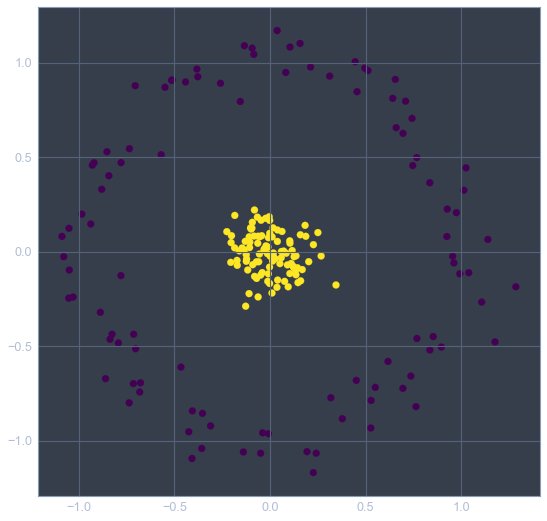

In [29]:
hide_code_in_slideshow()
plt.figure(figsize=(9,9))
X, y = make_circles(200, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, )

[(-2, 2), Text(0,0.5,'$X_2$'), (-2, 2), Text(0.5,0,'$X_1$'), None]

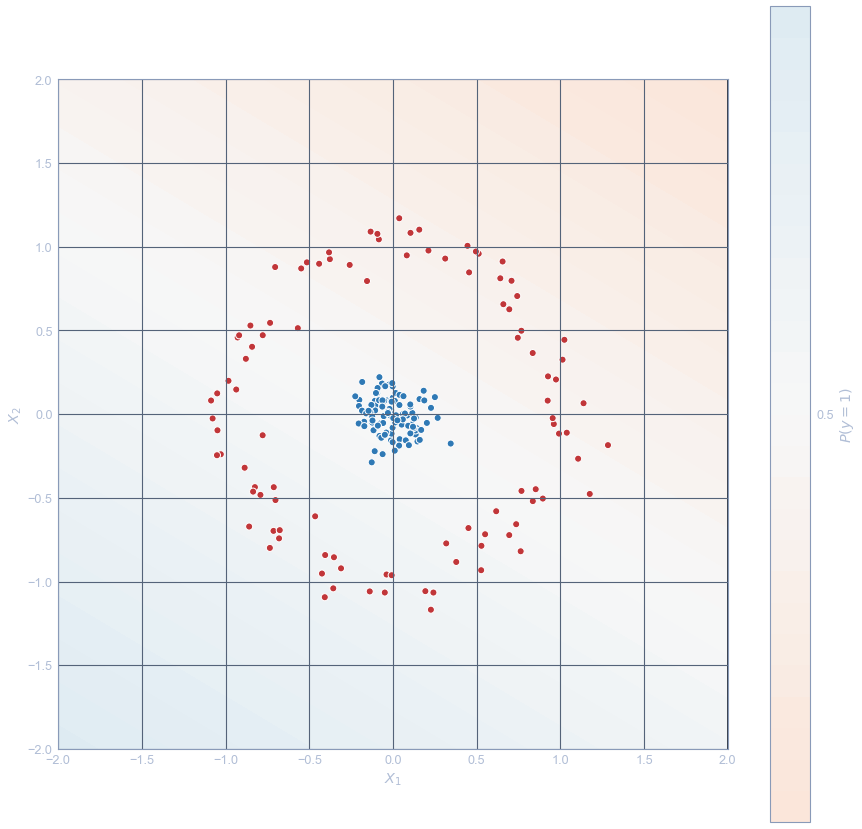

In [30]:
hide_code_in_slideshow()
clf = LogisticRegression().fit(X, y)
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f , ax = plt.subplots(figsize=(15, 15))

contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")


Accuracy of the Logistic Regression: 0.535


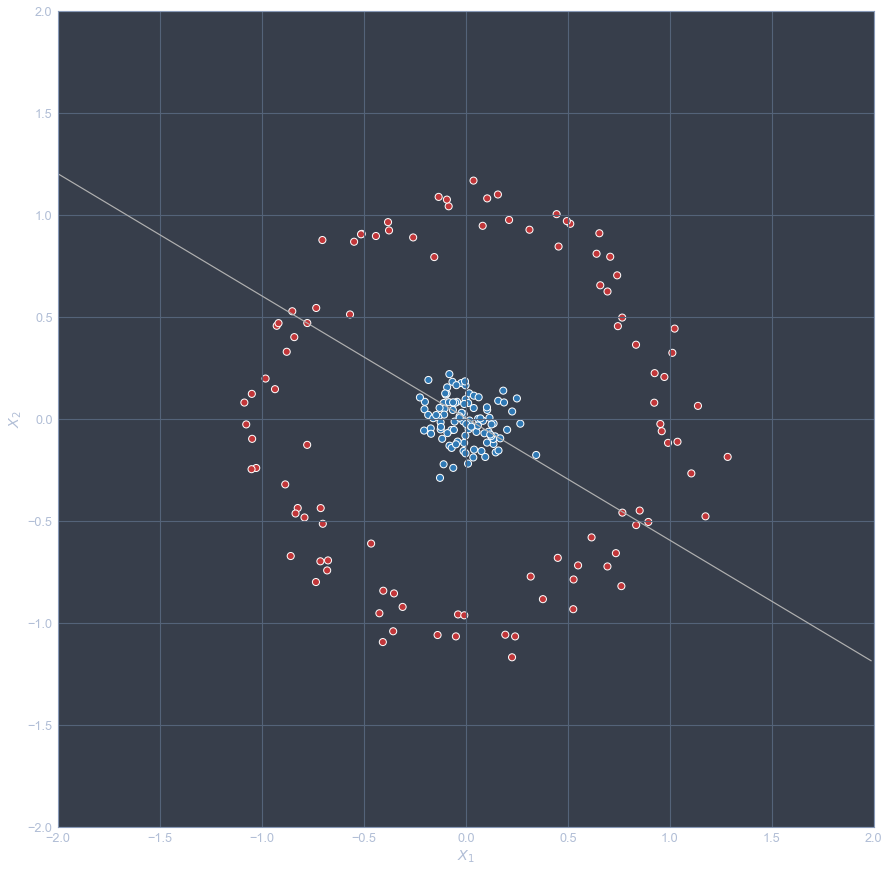

In [31]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1.2)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")
print("Accuracy of the Logistic Regression: {}" .format(clf.score(X,y)))

In [118]:
def toy_func(x):
    return (x >= -2) & (x <= 2)

def toy_predict(x,cutoff):
    return x >= cutoff
   
mu = 0
variance = 2
sigma = math.sqrt(variance)
xV = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
t_x = np.linspace(-4,4,20)
t_y = toy_func(t_x)



## Consider a Simple Example
- What if we only had 1 feature, and wanted to find a linear decision boundary for the following?
- Notice that no cutoff value will separate the 2 classes in the proper way. 

In [144]:
hide_code_in_slideshow()


def toy_cutoff(c_off):
    f , ax = plt.subplots(figsize=(8, 8))
    ax.scatter(t_x, np.zeros_like(t_x), c=t_y, cmap='spring')
    preds = toy_predict(t_x, c_off)
    toy_score = accuracy_score(y_true=t_y, y_pred=preds)
    ax.plot([c_off, c_off], [-.5,.5])
    print("Predictive Accuracy:{}".format(toy_score))
 

toy_c_off = interactive(toy_cutoff, c_off=(-4.0,4.0))
toy_c_off

interactive(children=(FloatSlider(value=0.0, description='c_off', max=4.0, min=-4.0), Output()), _dom_classes=…

In [150]:
kernel_button = Button(description="Project Up" )

def kernel_callback(b):
    scatt.y=mlab.normpdf(t_x, mu, sigma)
kernel_button.on_click(kernel_callback)

orig_button = Button(description="Project Down" )
def orig_callback(b):
    scatt.y = np.zeros_like(t_x)
orig_button.on_click(orig_callback)
    

In [151]:
hide_code_in_slideshow()
xs = LinearScale()
ys = LinearScale()
c_map = {False:'magenta', True:"yellow"}
colors = [c_map[i] for i in t_y]
#t_x, np.zeros_like(t_x)
scatt = Scatter(x=t_x, y=np.zeros_like(t_x), scales={'x': xs, 'y': ys}, colors=colors)
xax = Axis(scale=xs, label='x', grid_lines='solid')
yax = Axis(scale=ys, orientation='vertical', tick_format='0.2f', label="ϕ(x)", grid_lines='solid')

fig = Figure(marks=[scatt], axes=[xax, yax], animation_duration=1000)
display(kernel_button, orig_button)
fig

Button(description='Project Up', style=ButtonStyle())

Button(description='Project Down', style=ButtonStyle())

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='ϕ(x)', orientation='ve…

## Introduction to non-linear Feature Maps 
- The problem: what if there is no linear separation in the data?
- One answer: find a higher dimensional space where they are linearly separable!
    - The linear decision boundary in the higher dimensional space corresponds to a non-linear decision boundary locally. 
- That is, $\forall x\in X$, compute $\phi(x)$ for $$\phi: \mathbb{R}^p \to \mathbb{R}^d$$
- Now, instead of building a model on $(x_i, y_i)$, we build it on $(\phi(x_i), y_i)$
- What should we choose for $\phi$?
    - Problem dependent
    - Common choices are 
        - polynomial feature maps (ie $x \mapsto g(x)$ for some polynomial function $g$) 
        - Gaussian Feature Transformation $\leftarrow$ a good choice for this problem
    

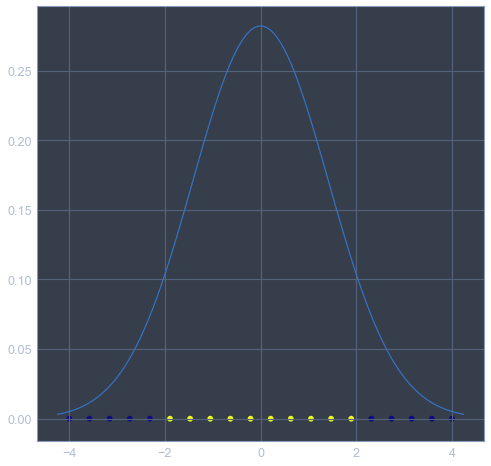

In [34]:
hide_code_in_slideshow()
plt.figure(figsize=(8,8))
plt.plot(xV,mlab.normpdf(xV, mu, sigma))
plt.scatter(t_x, np.zeros_like(t_x), c=t_y,cmap='plasma')


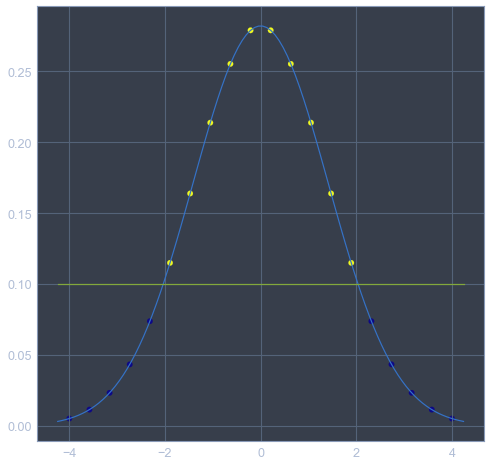

In [35]:
hide_code_in_slideshow()
plt.figure(figsize=(8,8))
plt.plot(xV,mlab.normpdf(xV, mu, sigma))
plt.scatter(t_x, mlab.normpdf(t_x, mu, sigma), c=t_y,cmap='plasma')
plt.plot(xV, np.zeros_like(xV)+.1 )

plt.show()

# What about in 2 dimensions? 
- How do we extend this idea to 2 dimensions, or even $p$ dimensions?
- Multivariate Gaussian

In [36]:
def Gaussian_plot():
    N = 60
    X = np.linspace(-3, 3, N)
    Y = np.linspace(-3, 4, N)
    X, Y = np.meshgrid(X, Y)

    # Mean vector and covariance matrix
    mu = np.array([0., 1.])
    Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

    # Pack X and Y into a single 3-dimensional array
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    def multivariate_gaussian(pos, mu, Sigma):
        """Return the multivariate Gaussian distribution on array pos.

        pos is an array constructed by packing the meshed arrays of variables
        x_1, x_2, x_3, ..., x_k into its _last_ dimension.

        """

        n = mu.shape[0]
        Sigma_det = np.linalg.det(Sigma)
        Sigma_inv = np.linalg.inv(Sigma)
        N = np.sqrt((2*np.pi)**n * Sigma_det)
        # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
        # way across all the input variables.
        fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

        return np.exp(-fac / 2) / N

    # The distribution on the variables X, Y packed into pos.
    Z = multivariate_gaussian(pos, mu, Sigma)

    # Create a surface plot and projected filled contour plot under it.
    fig = plt.figure(figsize=(16,16))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                    cmap='viridis')

    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap='viridis')

    # Adjust the limits, ticks and view angle
    ax.set_zlim(-0.15,0.2)
    ax.set_zticks(np.linspace(0,0.2,5))
    ax.view_init(27, -21)

    plt.show()
    return X,Y,Z

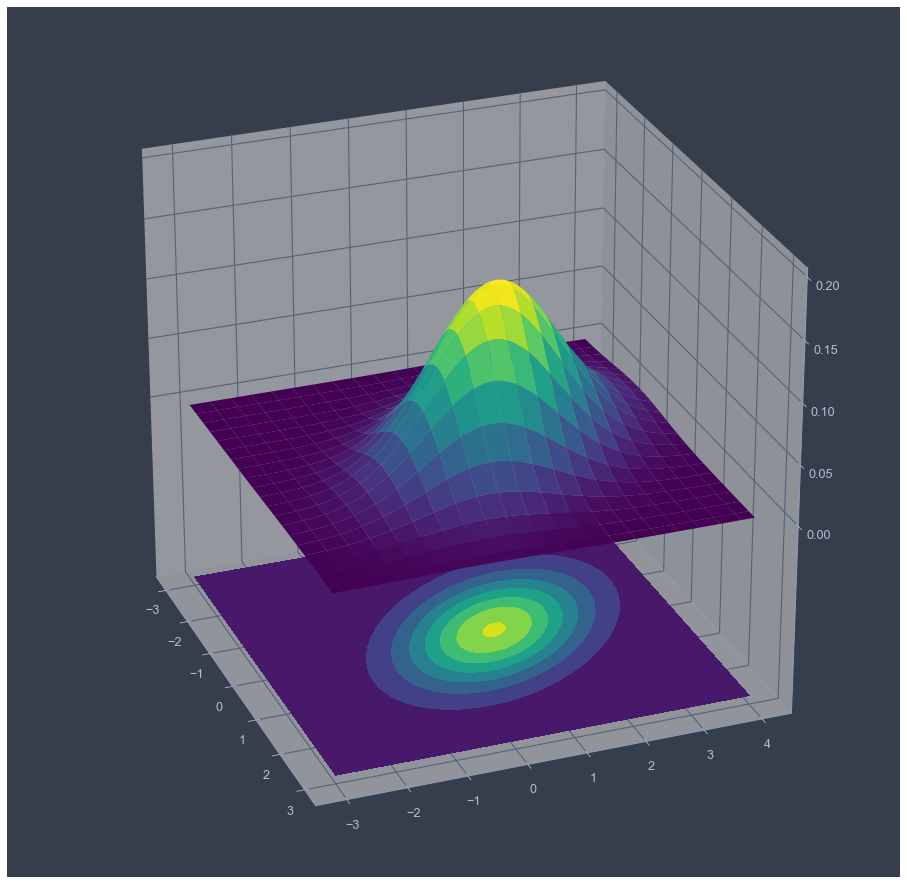

In [37]:
hide_code_in_slideshow()
gX, gY, gZ = Gaussian_plot()

In [38]:
hide_code_in_slideshow()
plot3D(gX,gY,gZ)

In [39]:
hide_code_in_slideshow()
proj_X, proj_y = make_circles(200, factor=.1, noise=.1)
p_r = np.exp(-(proj_X[:, 0] ** 2 + proj_X[:, 1] ** 2))
def plot_3D(elev=30, azim=30 ):
    plt.figure(figsize=(15,15))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(proj_X[:, 0], proj_X[:, 1], p_r, c=proj_y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interactive(plot_3D, elev=(-70, 90), azip=(-180, 180))

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-70), IntSlider(value=30, descriptio…

In [40]:
hide_code_in_slideshow()
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
X_trans = np.array([X[:, 0], X[:, 1], r]).T
clf = LogisticRegression().fit(X_trans, y)
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

exp_grid = np.exp(-(grid[:, 0] ** 2 + grid[:, 1] ** 2)).reshape((grid.shape[0],1))
exp_grid.shape
exp_grid =  np.hstack( (grid,exp_grid ))
probs = clf.predict_proba(exp_grid)[:, 1].reshape(xx.shape)

[(-2, 2), Text(0,0.5,'$X_2$'), (-2, 2), Text(0.5,0,'$X_1$'), None]

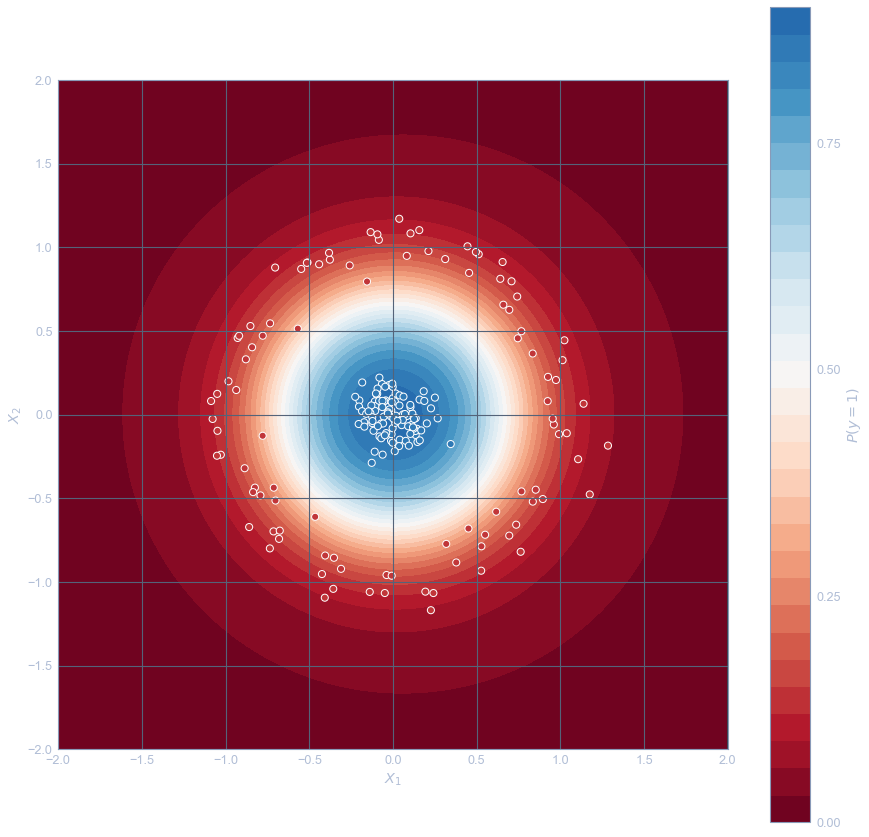

In [41]:
hide_code_in_slideshow()
f , ax = plt.subplots(figsize=(15, 15))

contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")

[(-2, 2), Text(0,0.5,'$X_2$'), (-2, 2), Text(0.5,0,'$X_1$'), None]

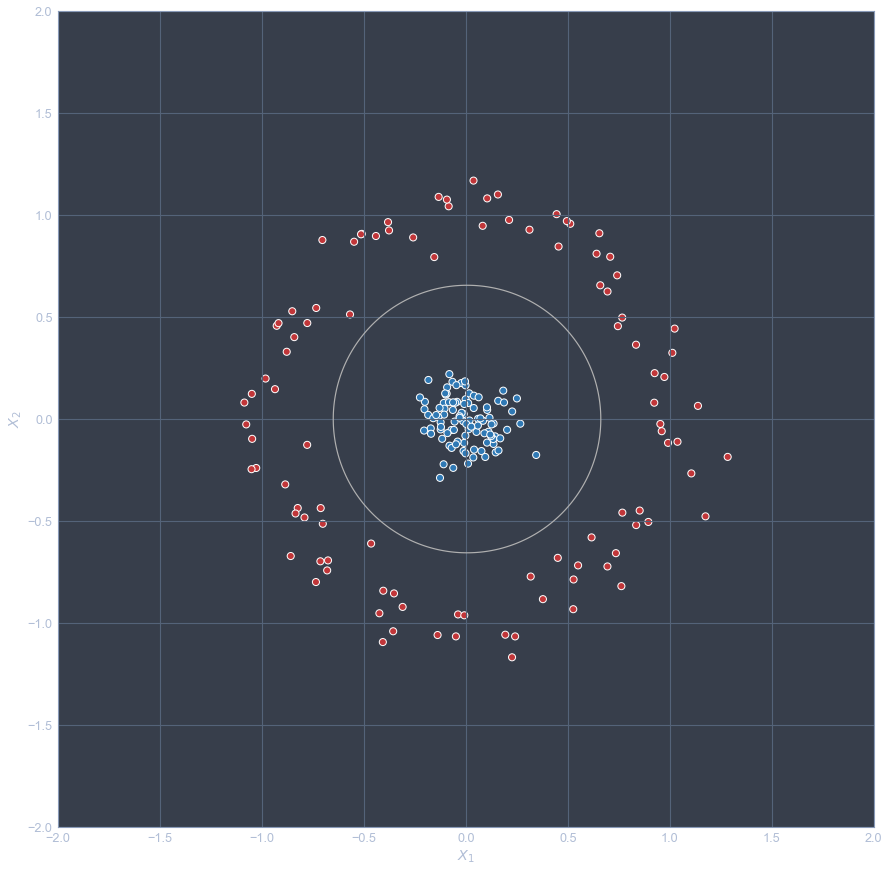

In [42]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1.2)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")


In [43]:

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.3 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    return X, Y

p_X, p_y = load_planar_dataset()

## Harder Classification Problems
- Is this trick a panacea? Will it always work?
- If not, what made it work on the previous examples?


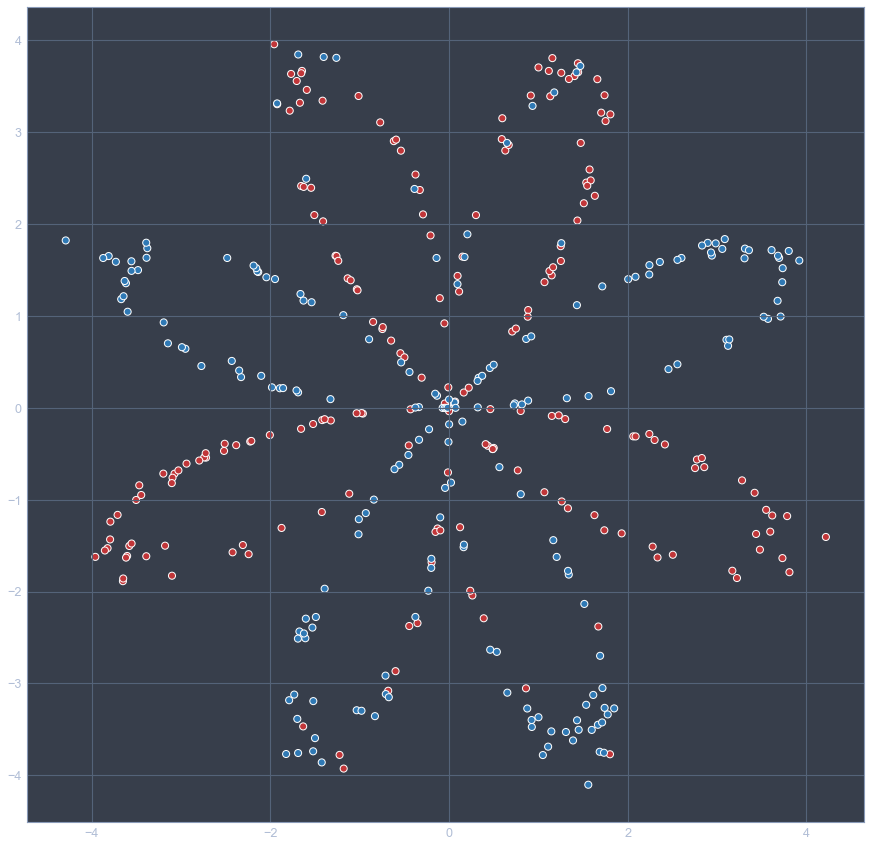

In [44]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(p_X[:,0], p_X[:, 1], c=p_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)



/Users/kbernardini/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


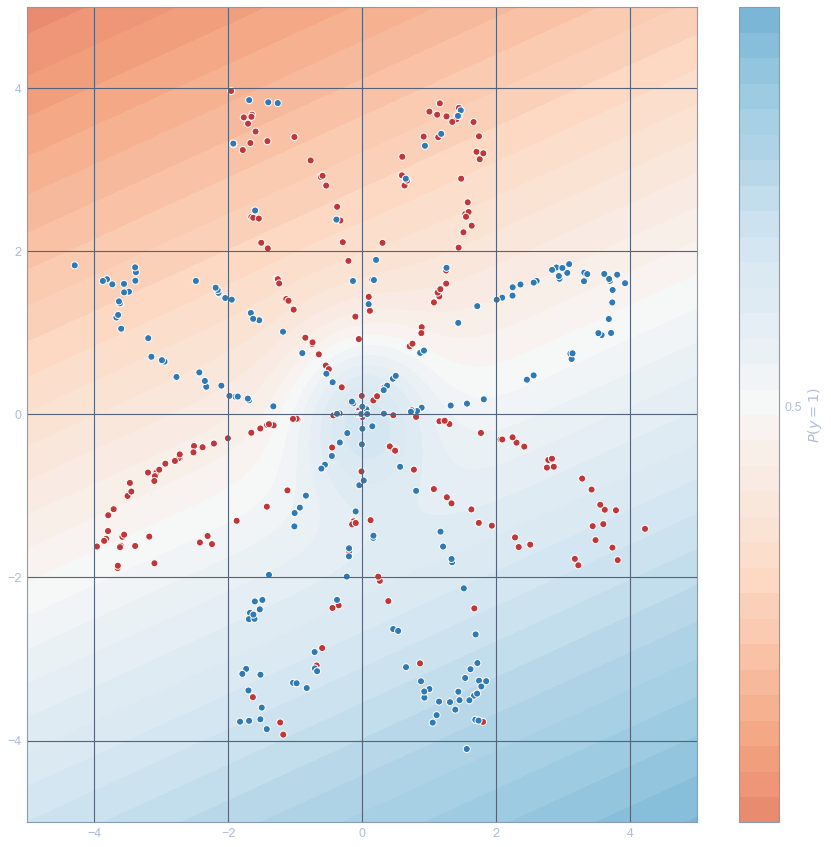

In [45]:
hide_code_in_slideshow()
r = np.exp(-(p_X[:, 0] ** 2 + p_X[:, 1] ** 2))

X_trans = np.array([p_X[:, 0], p_X[:, 1], r]).T
clf = LogisticRegression().fit(X_trans, p_y)
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

exp_grid = np.exp(-(grid[:, 0] ** 2 + grid[:, 1] ** 2)).reshape((grid.shape[0],1))
exp_grid.shape
exp_grid =  np.hstack( (grid,exp_grid ))
probs = clf.predict_proba(exp_grid)[:, 1].reshape(xx.shape)

f , ax = plt.subplots(figsize=(15, 15))

contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(p_X[:,0], p_X[:, 1], c=p_y.ravel(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)


## Polynomial Feature Transformation 
- We can also compute polynomial functions of the inputs
- ie, $$(x_1,x_2) \mapsto  x_1^2 + x_2^2 + x_1 x_2 + 1$$

In [46]:
def plot_poly_boundary(X, y, degree = 1):
    poly = PolynomialFeatures(degree=degree,interaction_only=False, include_bias=False).fit(X)
    X_tr = poly.transform(X)
    clf = LogisticRegression().fit(X_tr,y.ravel())
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    m = min(x_min, y_min) -.5
    M  = max(x_max, y_max) +.5
    
    xx, yy = np.mgrid[m:M:.1, m:M:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    tr_grid = poly.transform(grid)
    probs = clf.predict_proba(tr_grid)[:, 1].reshape(xx.shape)
    f , ax = plt.subplots(figsize=(15, 15))
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                          vmin=0, vmax=1)
    ax.scatter(X[:,0], X[:, 1], c=y.ravel(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])



In [47]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(p_X), y=fixed(p_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

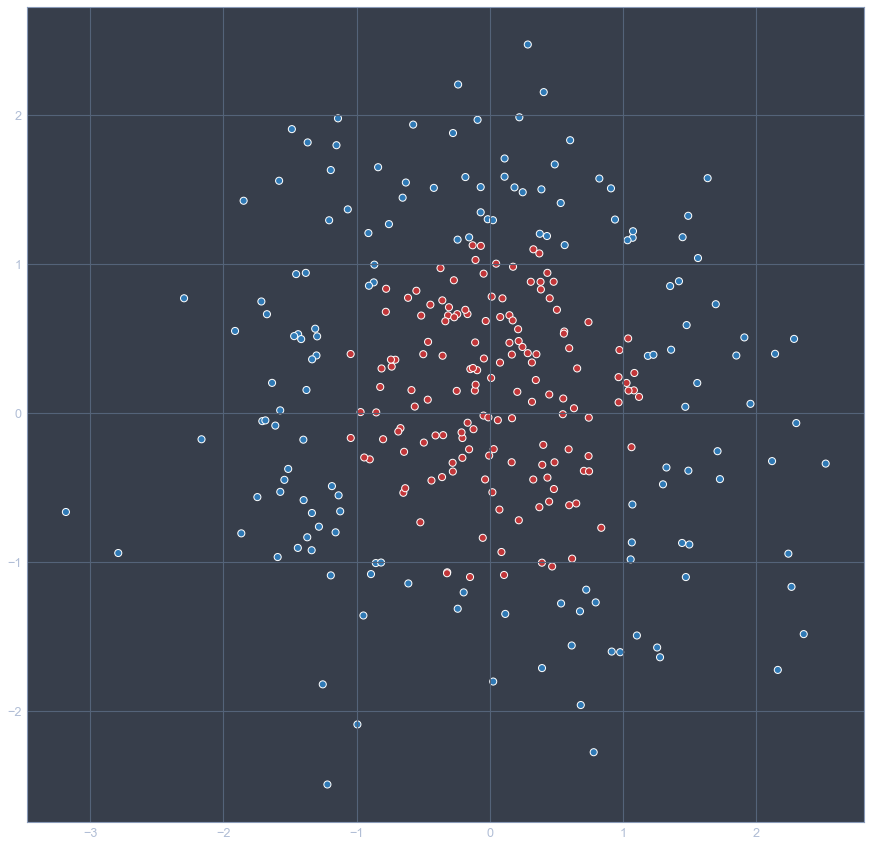

In [48]:
hide_code_in_slideshow()
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=1, n_samples=300, n_features=2, n_classes=2, shuffle=True, random_state=None)
gauss_X , gauss_y = gaussian_quantiles[0], gaussian_quantiles[1]

f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(gauss_X[:,0], gauss_X[:, 1], c=gauss_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [49]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(gauss_X), y=fixed(gauss_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

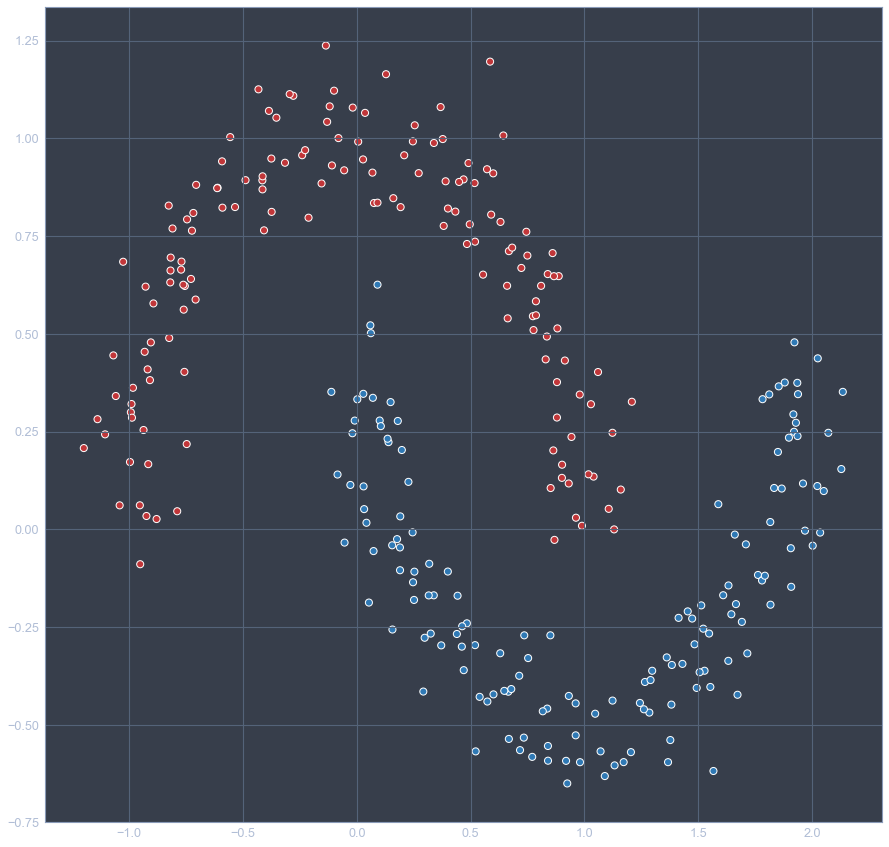

In [50]:
hide_code_in_slideshow()
noisy_moons = sklearn.datasets.make_moons(n_samples=300, noise=.1)
moon_X, moon_y = noisy_moons[0], noisy_moons[1]
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(moon_X[:,0], moon_X[:, 1], c=moon_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [51]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(moon_X), y=fixed(moon_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

In [52]:

def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

spiral_X, spiral_y = twospirals(1000)

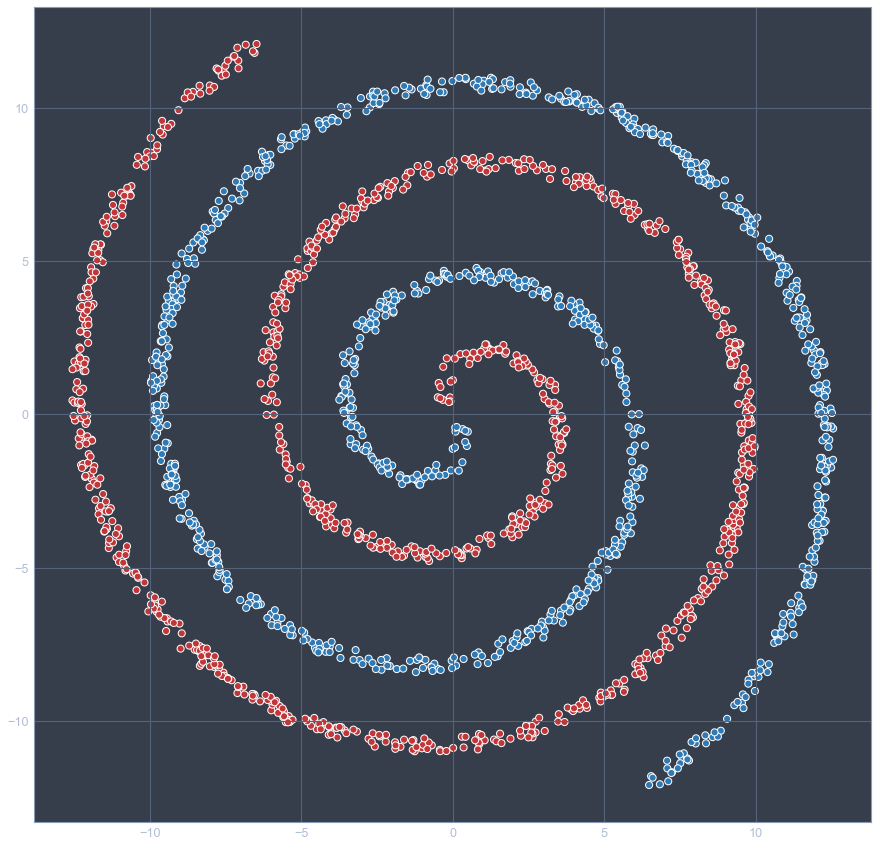

In [53]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(spiral_X[:,0], spiral_X[:, 1], c=spiral_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [54]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(spiral_X), y=fixed(spiral_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

# Remark On Multi Layer Perceptrons
- Network of Logistic Regressions (with some small changes)
- Composition of such functions allows for arbitrarily complex decision boundaries 
- Details are left for another time
<img src= 'https://cdn-images-1.medium.com/max/1600/1*Kdnux0Kw1yQ4D8dq__mYCA.png' width="100%" height="100%" >

In [55]:
from itertools import chain, product
class NeuralNet(Figure):
    def __init__(self, **kwargs):
        self.height = kwargs.get('height', 600)
        self.width = kwargs.get('width', 960)
        self.directed_links = kwargs.get('directed_links', False)
        
        self.num_inputs = kwargs['num_inputs']
        self.num_hidden_layers = kwargs['num_hidden_layers']
        self.nodes_output_layer = kwargs['num_outputs']
        self.layer_colors = kwargs.get('layer_colors', 
                                       ['Orange'] * (len(self.num_hidden_layers) + 2))
        
        self.build_net()
        super(NeuralNet, self).__init__(**kwargs)
    
    def build_net(self):
        # create nodes
        self.layer_nodes = []
        self.layer_nodes.append(['x' + str(i+1) for i in range(self.num_inputs)])
        
        for i, h in enumerate(self.num_hidden_layers):
            self.layer_nodes.append(['h' + str(i+1) + ',' + str(j+1) for j in range(h)])
        self.layer_nodes.append(['y' + str(i+1) for i in range(self.nodes_output_layer)])
        
        self.flattened_layer_nodes = list(chain(*self.layer_nodes))
        
        # build link matrix
        i = 0
        node_indices = {}
        for layer in self.layer_nodes:
            for node in layer:
                node_indices[node] = i
                i += 1

        n = len(self.flattened_layer_nodes)
        self.link_matrix = np.empty((n,n))
        self.link_matrix[:] = np.nan

        for i in range(len(self.layer_nodes) - 1):
            curr_layer_nodes_indices = [node_indices[d] for d in self.layer_nodes[i]]
            next_layer_nodes = [node_indices[d] for d in self.layer_nodes[i+1]]
            for s, t in product(curr_layer_nodes_indices, next_layer_nodes):
                self.link_matrix[s, t] = 1
        
        # set node x locations
        self.nodes_x = np.repeat(np.linspace(0, 100, 
                                             len(self.layer_nodes) + 1, 
                                             endpoint=False)[1:], 
                                 [len(n) for n in self.layer_nodes])

        # set node y locations
        self.nodes_y = np.array([])
        for layer in self.layer_nodes:
            n = len(layer)
            ys = np.linspace(0, 100, n+1, endpoint=False)[1:]
            self.nodes_y = np.append(self.nodes_y, ys[::-1])
        
        # set node colors
        n_layers = len(self.layer_nodes)
        self.node_colors = np.repeat(np.array(self.layer_colors[:n_layers]), 
                                     [len(layer) for layer in self.layer_nodes]).tolist()
        
        xs = LinearScale(min=0, max=100)
        ys = LinearScale(min=0, max=100)
        
        self.graph = Graph(node_data=[{'label': d, 
                                       'label_display': 'none'} for d in self.flattened_layer_nodes], 
                           link_matrix=self.link_matrix, 
                           link_type='line',
                           colors=self.node_colors,
                           directed=self.directed_links,
                           scales={'x': xs, 'y': ys}, 
                           x=self.nodes_x, 
                           y=self.nodes_y,
                           # color=2 * np.random.rand(len(self.flattened_layer_nodes)) - 1
                          )
        self.graph.hovered_style = {'stroke': '1.5'}
        self.graph.unhovered_style = {'opacity': '0.4'}
        
        self.graph.selected_style = {'opacity': '1',
                                     'stroke': 'red',
                                     'stroke-width': '2.5'}
        self.marks = [self.graph]
        self.title = 'Neural Network'
        self.layout.width = str(self.width) + 'px'
        self.layout.height = str(self.height) + 'px'

In [56]:
NeuralNet(num_inputs=3, num_hidden_layers=[10, 10, 10, 5], num_outputs=1)

NeuralNet(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='600px', min_wid…

In [57]:
hide_code_in_slideshow()
def mlp_plot(num_layers, layer_size):
    arch = [layer_size] * num_layers
    clf = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=arch,alpha=0 )
    clf.fit(spiral_X, spiral_y)

    x_min, x_max = spiral_X[:,0].min() - 1, spiral_X[:,0].max() + 1
    y_min, y_max = spiral_X[:,1].min() - 1, spiral_X[:,1].max() + 1
    m = min(x_min, y_min) -.25
    M  = max(x_max, y_max) + .25

    xx, yy = np.mgrid[m:M:.1, m:M:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]



    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)


    f , ax = plt.subplots(figsize=(15, 15))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])


    ax.scatter(spiral_X[:,0], spiral_X[:, 1], c=spiral_y.flatten(), s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

mlp_interact = interactive(mlp_plot, num_layers=1,layer_size=1 )
mlp_interact.children[0].max = 10
poly_interact.children[0].min = 1
mlp_interact.children[1].max = 50
poly_interact.children[1].min = 1
display(mlp_interact)

interactive(children=(IntSlider(value=1, description='num_layers', max=10, min=-1), IntSlider(value=1, descrip…

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=4,4&seed=0.38056&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


# Real World Example: 
## Wisconsin Breast Cancer Dataset
- Classification Task: Predict weather or not a tumor is benign (0) or Malignant (1)


In [58]:
data = load_breast_cancer()
features = list(data['feature_names'])
target = data['target'].reshape( (len(data['target']),1))
names = features + ['target']
XY= np.hstack((data['data'], target) )
df = pd.DataFrame(data=XY, columns=names)
# make 1 malignant and 0 benign
df.target = ((df.target - 1) * -1).astype(int)

In [59]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       1  
1          0.2750                  0.08902       1  
2          0.3613                  0.08758       1  
3          0.6638                  0.17300       1  
4          0.2364                  0.07678       1  

[5 rows x 31 columns]

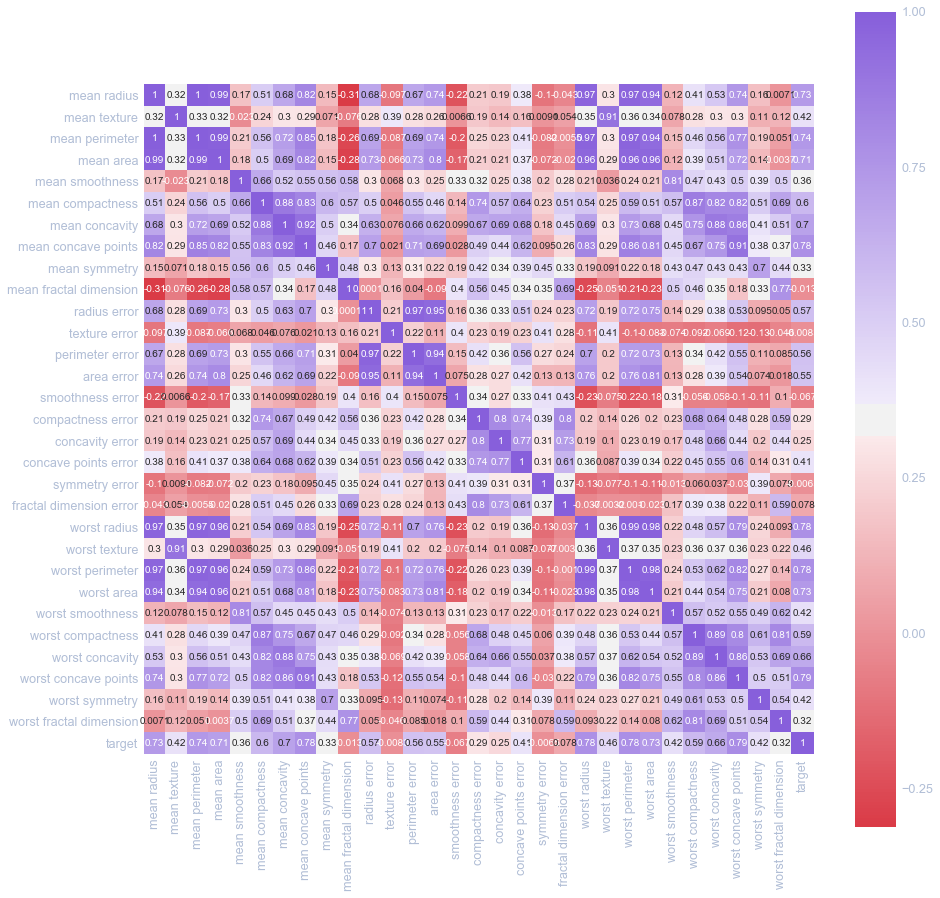

In [60]:
hide_code_in_slideshow()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, square=True, cmap= sns.diverging_palette(10, 275, as_cmap=True))
plt.show()

/Users/kbernardini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


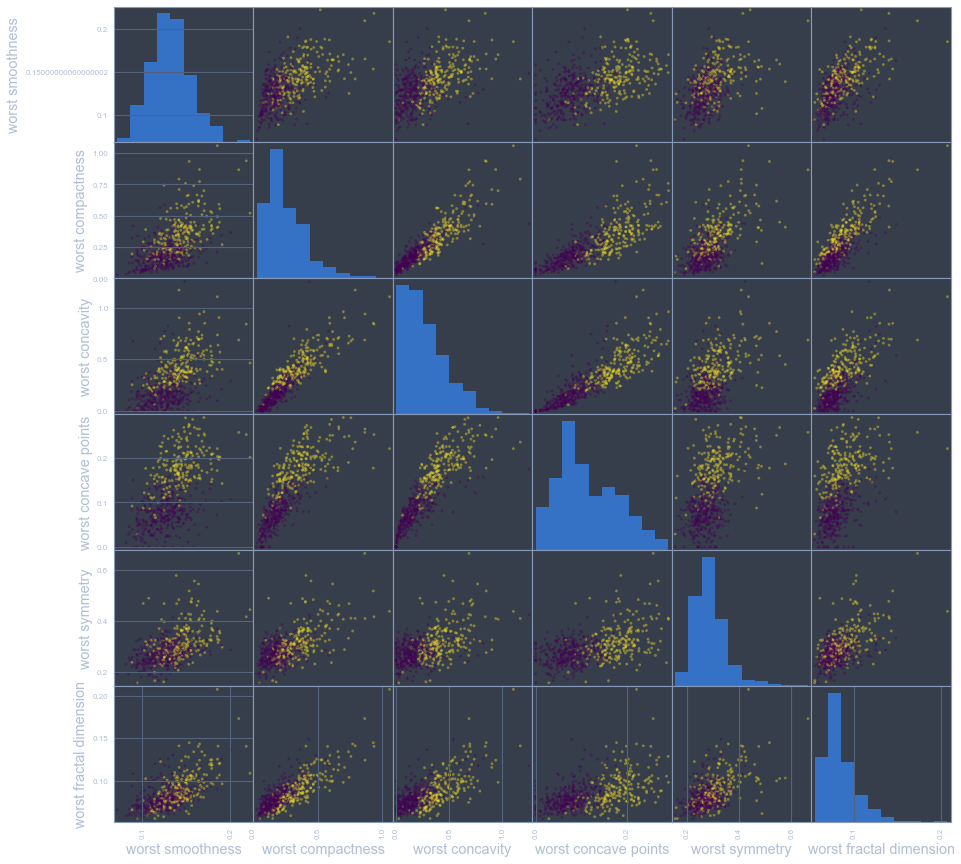

In [61]:
hide_code_in_slideshow()
features_mean= list(df.columns[24:-1])
sm = pd.scatter_matrix(df[features_mean], c=df.target, alpha=0.4, figsize=((15,15)));

plt.show()

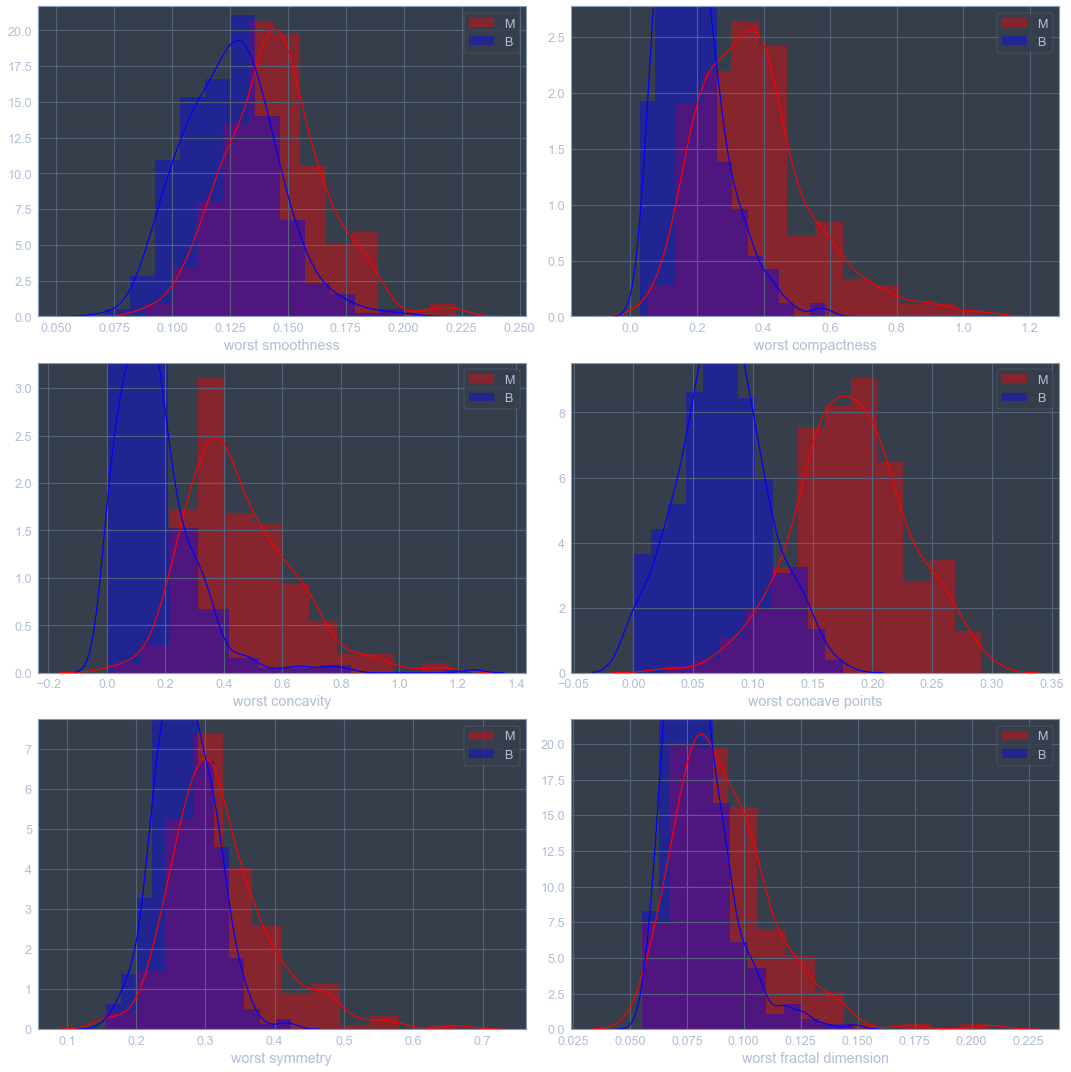

In [62]:
hide_code_in_slideshow()
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[df['target']==1][feature], bins=bins, color='red', label='M');
    sns.distplot(df[df['target']==0][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

/Users/kbernardini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


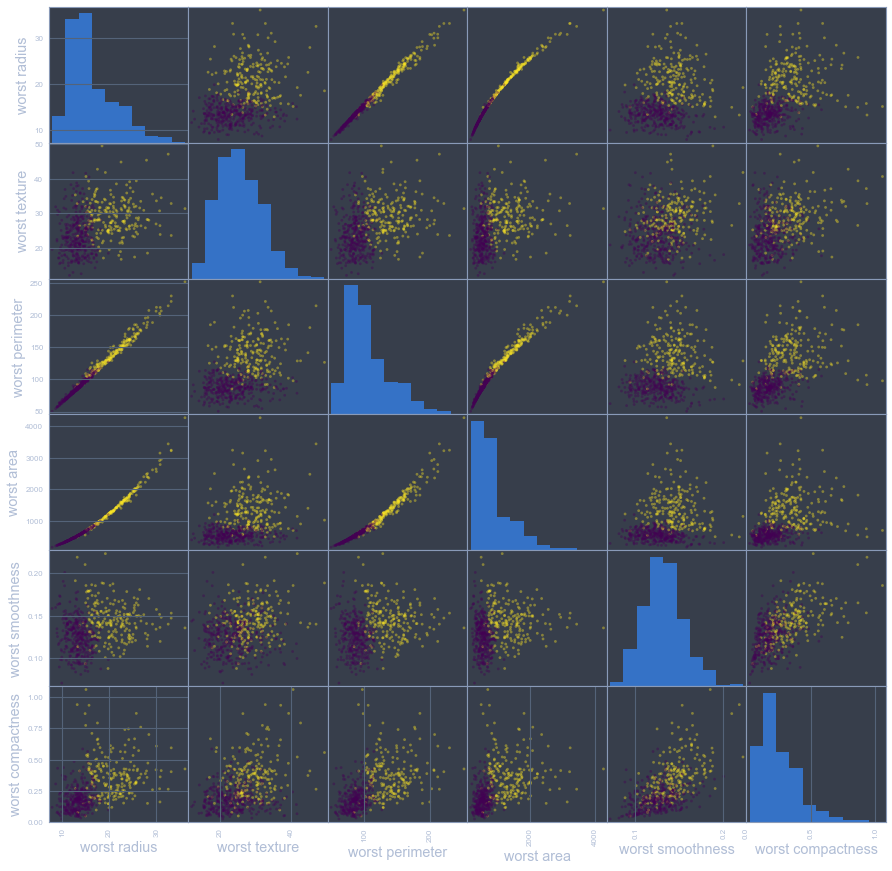

In [63]:
hide_code_in_slideshow()
features_mean= list(df.columns[20:26])
sm = pd.scatter_matrix(df[features_mean], c=df.target, alpha=0.4, figsize=((15,15)));

plt.show()

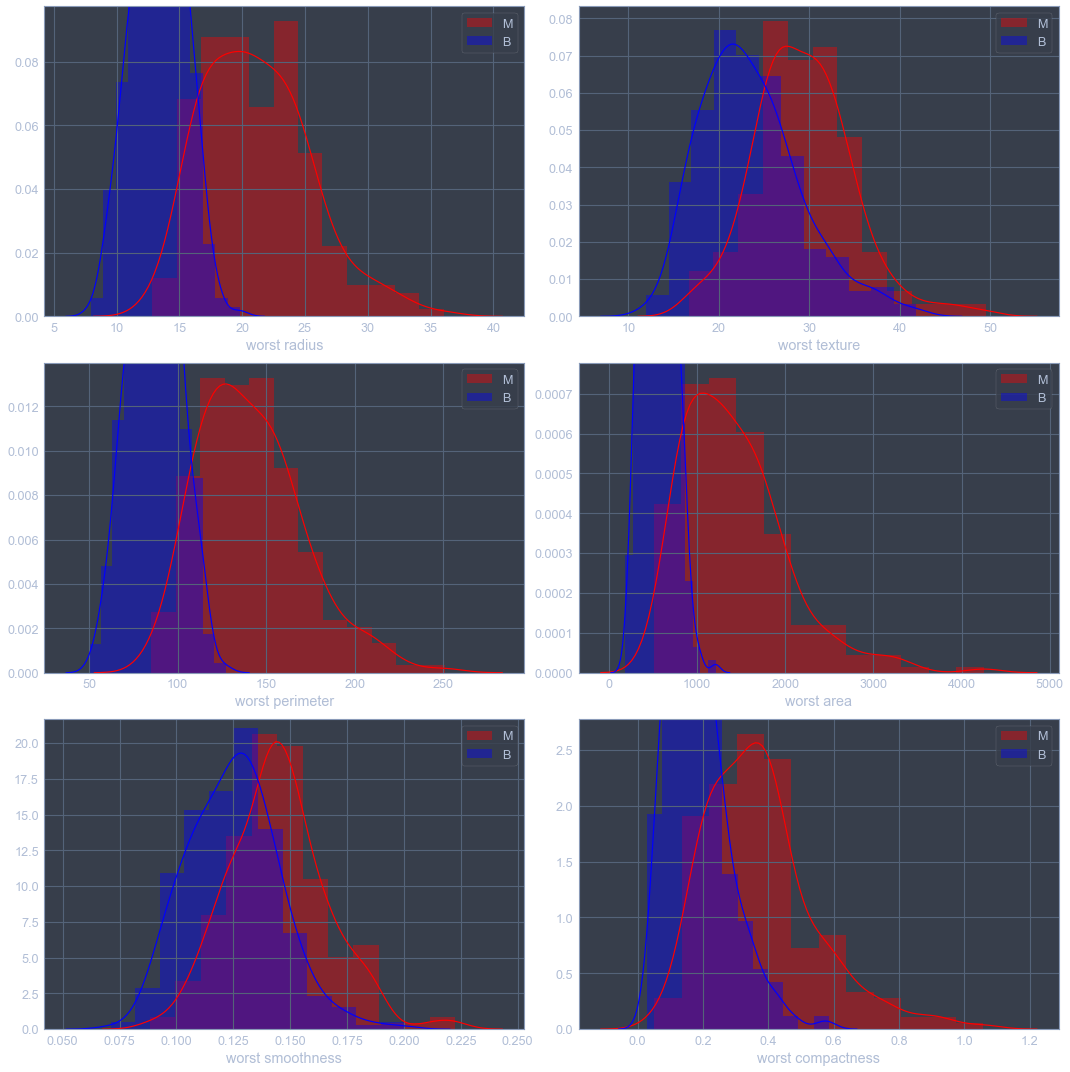

In [64]:
hide_code_in_slideshow()

bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[df['target']==1][feature], bins=bins, color='red', label='M');
    sns.distplot(df[df['target']==0][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [65]:
clf = LogisticRegression()
clf.fit(df[features], df.target)
clf.score(df[features], df.target)

0.9595782073813708

# Low Rank Approximation to $X$ 
- Consider an $X_{n \times p}$

$$  \mbox{$n$ Observations}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{n1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{nj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1n}\\\vdots\\x_{id}\\\vdots\\x_{np}\end{array}
\end{array}\right]}^{p \text{ features}} = \mat{{cccc}\vx^{(1)}&\vx^{(2)}&\dots&\vx^{(1)}}^T$$


The rank of $X$ is the dimension of its column space.
The dimension of a space is the smallest number of linearly independent vectors needed to span the space.  Hence,  the dimension of the column space of $A$ is the smallest number of vectors that suffice to  span the columns of $X$. Then the rank of $A$ is the size of the smallest set $\{\vu_1, \vu_2, \dots, \vu_p\}$ such that every $\vx_i$ can be expressed as:

$$\vx_i = c_{i1}\vu_1 + c_{i2}\vu_2 + \dots + c_{ip}\vu_p\;\;\;\;i=1,\dots,n.$$

-The largest value that a matrix rank can take is $\min(n,d)$.

- The rank of a matrix can be less than $\min(m,n)$.
- Representing a matrix $A \in \R^{n\times d}$ requires  $m n$ values.
- If $X$ has rank $k$, it can be factored as $X = UV$
where $U \in \R^{n\times k}$ and $V \in \R^{k \times p}$.
This only requires $k(n+p)$ values, which could be much smaller than $np$.

$$
\mbox{$n$ observations }\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{n1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{nj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1p}\\\vdots\\x_{ip}\\\vdots\\x_{np}\end{array}
\end{array}\right]}^{p \text{ features}} =
\overbrace{\left[\begin{array}{cc}\vdots&\vdots\\\vdots&\vdots\\\vu_1&\vu_k\\\vdots&\vdots\\\vdots&\vdots\end{array}\right]}^{\large k}
\times
\left[\begin{array}{ccccc}\dots&\dots&\vv_1&\dots&\dots\\\dots&\dots&\vv_k&\dots&\dots\end{array}\right]
$$


# Theorem [The Singular Value Decomposition]
Every $n \times m$ matrix $X$ has a decomposition $$X = U\Sigma V^T$$ where
- $V$ is an orthogonal $m\times m$ matrix;
- $\Sigma$ is a diagonal $n \times m$ matrix; and 
- $U$ is an orthogonal $n \times n$ matrix.

 For an $n \times m$ matrix $X$, the singular values of $X$ are the square roots of the eigenvalues of the symmetric matrix $X^T X$.  The singular values are written  $\sigma_1, \cdots, \sigma_m$ where $\sigma_i\geq \sigma_{i+1}$.  
 - This relies on an important result from Linear Algebra is the spectral theorem which guarantees the existence of eigenvalues for all symmetric matrices. 
 - Further, it guarantees that a matrix is orthogonally diagonalizable if and only if the matrix is symmetric. 


# Principal Components Analysis 
In summary, PCA consists of:
- Mean center the data, and
- Reduce the dimension of the mean-centered data via SVD.
- This is equivalent to projecting the data onto the subspace that captures the maximum variance in the data.

It winds up constructing the best low dimensional approximation of the data.
What are "principal components"?
These are nothing more than the columns of $U$ (or the rows of $V^T$). Because they capture the direction of maximum variation, they are called "principal" components.

In [66]:
pca = decomposition.PCA(n_components=2)
scaler = StandardScaler()
scaler.fit(df[features])
preprocessed_data = scaler.transform(df[features])
pca.fit(preprocessed_data)
pca_X = pca.transform(preprocessed_data)

In [67]:
X_df = pd.DataFrame(pca_X)
X_df['target'] = df.target.values
mal = X_df.loc[X_df['target'] == 1]
clean = X_df.loc[X_df['target'] == 0]

# 2 Dimensional Visualization 
- We can use the first two principal components to visualize the 30 dimensional dataset
    - Warning: it is not necessarily a good idea to build models on this dataset. 

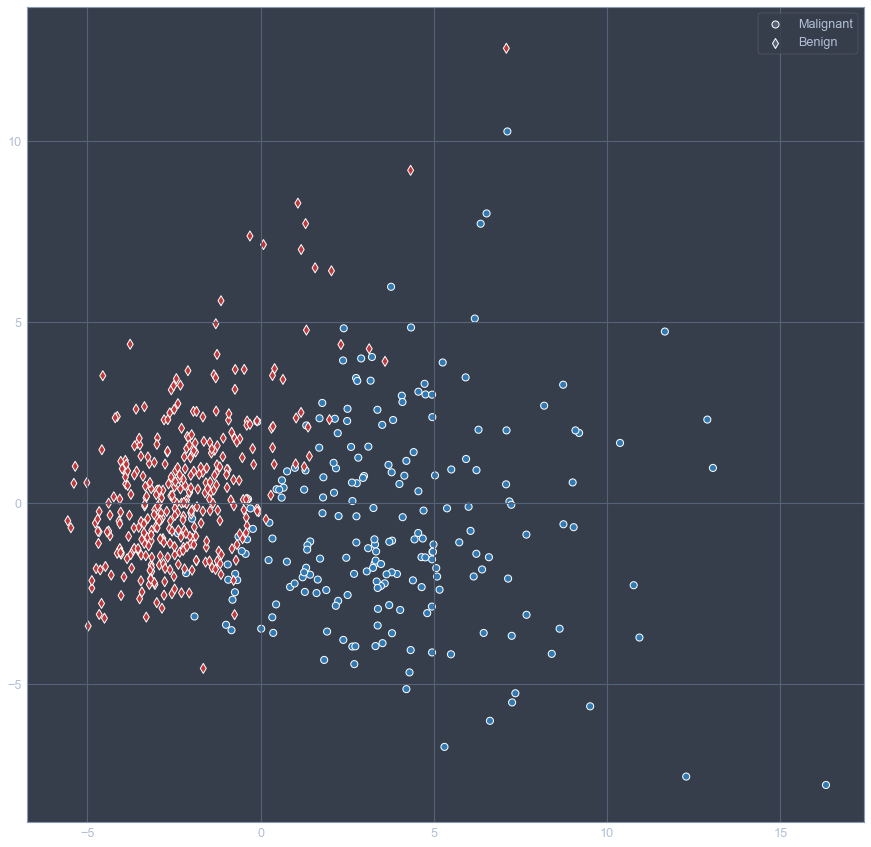

In [68]:
hide_code_in_slideshow()
def plot_pca_data(f=None,ax=None):
    if f == None:
        f, ax = plt.subplots(figsize=(15, 15))
    ax.scatter(mal.values[:,0], mal.values[:, 1], c=mal.target, s=50,label='Malignant',
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)
    ax.scatter(clean.values[:,0], clean.values[:, 1], c=clean.target, marker='d',s=50,label='Benign',
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.legend()
plot_pca_data()

In [69]:
hide_code_in_slideshow()
def poly_plot(X, y, degree = 1):
    poly = PolynomialFeatures(degree=degree,interaction_only=False, include_bias=False).fit(X)
    X_tr = poly.transform(X)
    clf = LogisticRegression().fit(X_tr,y.ravel())
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    m = min(x_min, y_min) -1
    M  = max(x_max, y_max) + 1
    
    xx, yy = np.mgrid[m:M:.1, m:M:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    print(grid.shape)
    
    tr_grid = poly.transform(grid)
    probs = clf.predict_proba(tr_grid)[:, 1].reshape(xx.shape)
    f , ax = plt.subplots(figsize=(15, 15))
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                          vmin=0, vmax=1)
    plot_pca_data(f,ax)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])



(78961, 2)


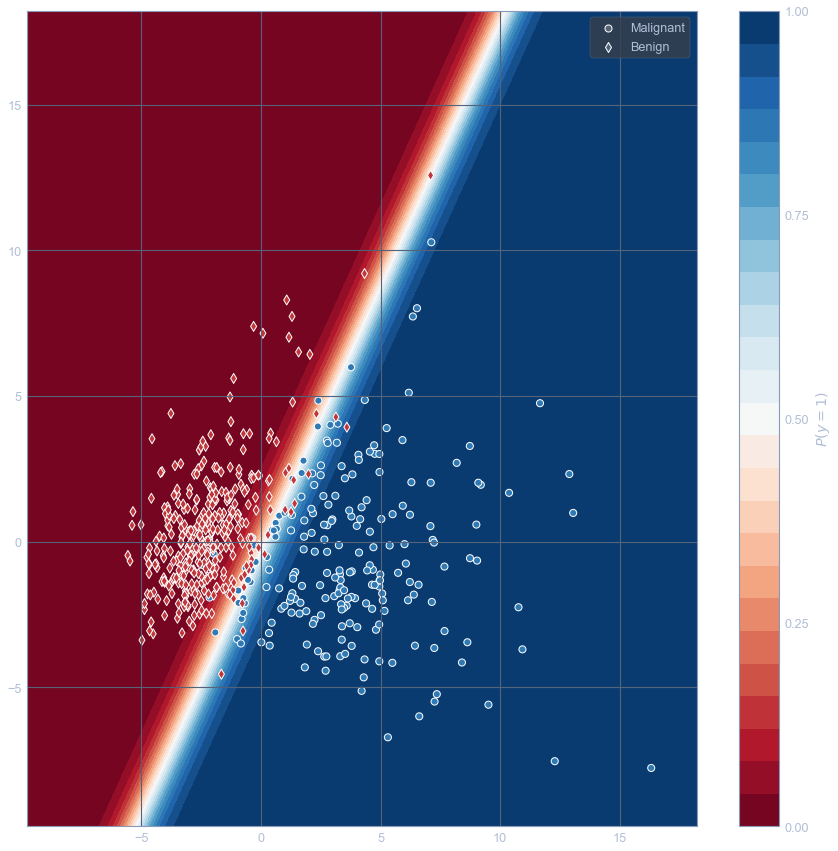

In [70]:
hide_code_in_slideshow()
poly_plot(X_df[[0,1]].values, df.target.values)

In [71]:
hide_code_in_slideshow()

poly_interact = interactive(poly_plot, X=fixed(X_df[[0,1]].values), y=fixed( df.target.values) ,deg=1)
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

In [72]:
hide_code_in_slideshow()

poly = PolynomialFeatures(degree=3,interaction_only=False, include_bias=False).fit(X_df[[0,1]])
X_tr = poly.transform(X_df[[0,1]])
clf = LogisticRegression().fit(X_tr, df.target.values.ravel())

prob_preds = clf.predict_proba(X_tr)

In [73]:

fpr, tpr, thresholds = roc_curve( df.target.values.ravel(), prob_preds[:,1])
AUC = auc(fpr,tpr)

In [74]:
def find_closest_index(cutoff, thresholds):
    """
    Finds the threshold closest to the cutoff. 
    
    Arguments:
    cutoff -- scalar cutoff value
    threshholds -- list of all unique probabilities 
    TODO: implement this using Binary Search 
    
    Return:
    best_index -- index of thresholds that has a value closest to cutoff
    TODO: Implement with binary search. 
    """
    best_index = -1
    min_dist = 9999999
    for i in range(len(thresholds)):
        tmp = abs(cutoff - thresholds[i])
        if tmp < min_dist:
            min_dist = tmp
            best_index = i
    return best_index

In [75]:
hide_code_in_slideshow()

cm_cols = ["Predicited Benign", "Predicted Malignant"]
cm_index = ["Benign", "Malignant"]
Y = df.target.values
def plot_roc(cutoff):
    cutoff_index = find_closest_index(cutoff, thresholds)
    print("Closest threshold is", thresholds[cutoff_index])
    print("For threshold of: " ,thresholds[cutoff_index], 'FPR:', fpr[cutoff_index], "TPR:", tpr[cutoff_index])
    fig = plt.figure(figsize=(8,8))
    plt.plot(fpr,tpr)
    plt.title("ROC curve with AUC={}".format(AUC))
    plt.plot([0,1],'r--') 
    plt.scatter(fpr[cutoff_index],tpr[cutoff_index], marker='x',s=200, c='r')
    preds = np.array(prob_preds) >= cutoff
    preds = preds[:,1]
    preds = preds.astype(int)
    cm = confusion_matrix(Y, preds)
    f1 = f1_score(df.target.values, preds)
    cm_df = pd.DataFrame(cm, index=cm_index, columns=cm_cols)
    print('F1-score',f1)
    print()
    print(cm_df)
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")
    
interactive(plot_roc, cutoff=(0.,1.))

interactive(children=(FloatSlider(value=0.5, description='cutoff', max=1.0), Output()), _dom_classes=('widget-…

# Further Work: What is missing?
## Modeling Concerns

- "All models are wrong, some are useful" [George Box]
- The human element 
    - Implications of false positives and false negatives
- Feature Selection
    - Are all features important?
- Partitioning data
    - Practice test and Midterm analogy 
- Model Selection and Cross Validation
    - Evaluating Models
- Regularization
    - Bias, variance, and conservative estimates



# Overfitting 
- If you train your model on examples that it already has seen the answer to, this will give you an overly optimistic estimate of the error 
- It is essentially cheating
    - Note only using a testing set is typically not enough to prevent overfitting in general. Typically, models use regularization as well. 
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2016-09/26/6/asset/buzzfeed-prod-web11/anigif_sub-buzz-5611-1474885869-2.gif">

# What happens if you cheat on all of your tests?
- You fail in real life.
<img src='https://steemit-production-imageproxy-web.s3.amazonaws.com/U5dsp5EcNzdiptcYKeLowQzk22VuW3g'>


# Ensuring Generality of a Model
## Steps you can take...
- Build your model with  Training Set
- Score your model on the Testing set which is composed of examples the model has yet to see. 
- Selection by cross validation
    - Regularization, (using a validation set to select hyperparameters)

In [76]:
import h2o 
from h2o.estimators.glm import H2OGeneralizedLinearEstimator as glm
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         1 day 4 hours 22 mins
H2O cluster version:        3.16.0.4
H2O cluster version age:    3 months and 3 days
H2O cluster name:           H2O_from_python_kbernardini_vpmart
H2O cluster total nodes:    1
H2O cluster free memory:    3.269 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.3 final
--------------------------  ----------------------------------------

In [77]:
h2o_df = h2o.H2OFrame(df)
train, valid, test = h2o_df.split_frame([0.6, 0.2], seed=7176) 
predictors = h2o_df.col_names[:-1] # A list of column names or indices indicating the predictor columns.
diagnosis = h2o_df.col_names[-1]

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [78]:
cv_logistic = glm(
                    model_id='glm_model',            #allows us to easily locate this model in Flow
                    family='binomial',
                    nfolds=5,
                    lambda_ = 0,
                     max_iterations=1000,
                    compute_p_values = True
)
cv_logistic.train(x=predictors,
            y=diagnosis,
            training_frame=train,
            validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


/Users/kbernardini/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Reached maximum number of iterations 1000!
  warnings.warn(w)


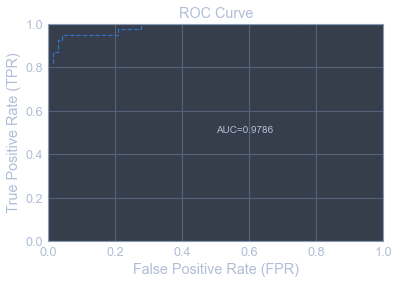

In [79]:
perf = cv_logistic.model_performance(test)
perf.plot()

In [80]:
cv_logistic._model_json['output']['coefficients_table'].as_data_frame()

names  coefficients     std_error   z_value   p_value  \
0                 Intercept   -876.681527   2431.500066 -0.360552  0.718435   
1               mean radius   -203.729918    993.010136 -0.205164  0.837444   
2              mean texture     -2.919445     43.547002 -0.067041  0.946549   
3            mean perimeter     36.102868    136.732631  0.264040  0.791749   
4                 mean area     -0.335581      2.926699 -0.114662  0.908713   
5           mean smoothness   1448.716875  11406.333148  0.127010  0.898933   
6          mean compactness  -2781.645866   7087.041789 -0.392497  0.694691   
7            mean concavity    545.440418   5992.143659  0.091026  0.927472   
8       mean concave points   -265.660835  10801.762744 -0.024594  0.980379   
9             mean symmetry    207.613079   4087.070971  0.050798  0.959487   
10   mean fractal dimension   5533.720645  30561.045802  0.181071  0.856312   
11             radius error    199.442595   1894.189773  0.105292  0.916144   
12            texture error     10.682131    191.409885  0.055808  0.955495   
13          perimeter error    -17.742057    266.842531 -0.066489  0.946989   
14               area error      0.742383      8.320313  0.089225  0.928903   
15         smoothness error  -2546.542619  42030.757978 -0.060588  0.951688   
16        compactness error   -469.588706  17667.655966 -0.026579  0.978796   
17          concavity error   -541.068948   8681.778038 -0.062322  0.950306   
18     concave points error   3760.483876  31360.891741  0.119910  0.904554   
19           symmetry error  -3785.228233  14896.240927 -0.254106  0.799413   
20  fractal dimension error   3313.080011  77836.340150  0.042565  0.966049   
21             worst radius     30.821759    328.526280  0.093818  0.925254   
22            worst texture      3.582962     37.634829  0.095203  0.924153   
23          worst perimeter     -2.899647     33.230608 -0.087258  0.930466   
24               worst area      0.018702      1.693803  0.011041  0.991190   
25         worst smoothness     -1.594498   8367.287596 -0.000191  0.999848   
26        worst compactness    162.117474   2599.903029  0.062355  0.950280   
27          worst concavity     53.176918   1614.945654  0.032928  0.973732   
28     worst concave points    144.982212   5097.057407  0.028444  0.977308   
29           worst symmetry    526.434485   2770.129771  0.190040  0.849278   
30  worst fractal dimension  -1052.682615  13852.031327 -0.075995  0.939423   

    standardized_coefficients  
0                   -2.963024  
1                 -701.711675  
2                  -13.041212  
3                  854.651753  
4                 -115.052885  
5                   20.805922  
6                 -143.862219  
7                   41.632880  
8                  -10.080196  
9                    5.859360  
10                  40.812926  
11                  54.553274  
12                   6.064216  
13                 -34.416924  
14                  31.681187  
15                  -7.611472  
16                  -7.750369  
17                 -14.253019  
18                  20.601381  
19                 -32.546439  
20                   8.242100  
21                 143.738049  
22                  22.562423  
23                 -92.747971  
24                  10.088065  
25                  -0.036071  
26                  24.648139  
27                  10.975229  
28                   9.182620  
29                  34.253031  
30                 -19.499174

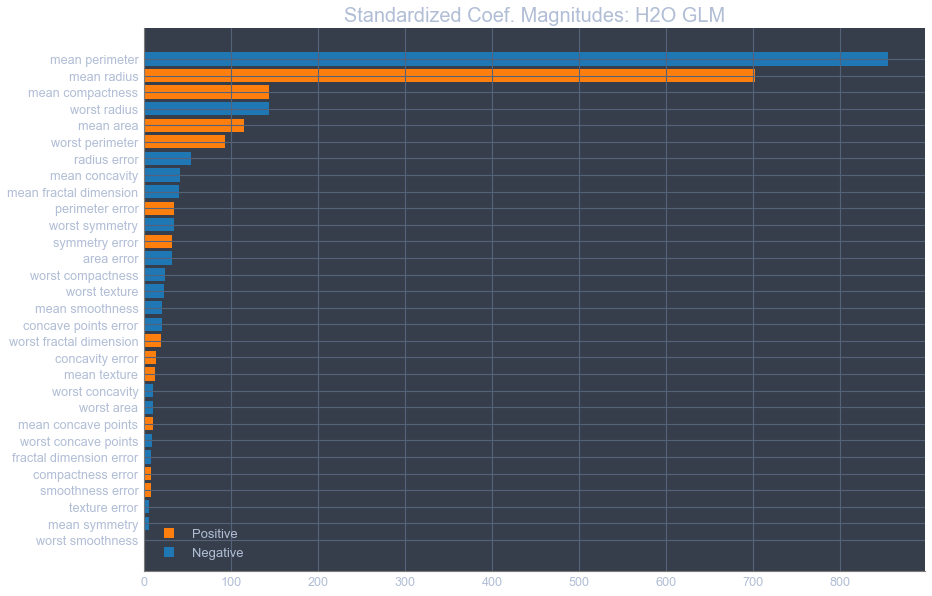

In [81]:
cv_logistic.std_coef_plot()

# Key Takeaways 
- Machine Learning is teaching  a machine to act without being explicitly programming to do so
    - Non-example: Deep Blue (Chess)
    - Example: AlphaGo (Go)
- Machine Learning is Accessible 
    - It is just Probability, Multi-variable Calc and Linear Algebra
    - Code to build Logistic Regression from scratch $<$ 100 lines of code
    - It is not about the techniques so much as it is about the Data
- Machine Learning Geometrizes the real world 
- Its Essential 

## Want to learn more? Check out...
- [Machine Learning Course](https://www.coursera.org/learn/machine-learning)
- [Deep Learning Course](https://www.coursera.org/specializations/deep-learning)
- [Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
- [Bishop Pattern Recognition](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
- [Deep Learning Book](http://www.deeplearningbook.org/)

## Questions?
- Feel free to email me kaidb@bu.edu


# References
- https://www.coursera.org/
- https://github.com/bloomberg/bqplot
- https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science
